# Digital Screen Time Analysis for Predicting Well-being Scores Through Machine Learning

## How does digital screen time affect your well-being?

Recently, one clinical trial reported that a short-term reduction in digital screen time could improve
children’s and adolescents’ behaviours and psychological symptoms. How does the use of digital screen
time affect our sense of well-being?

In this group project, our team will use data science skills and techniques to discover
how digital screen time affects self-reported well-being among a large cohort of adolescents in a country.

## Data Dictionary

**Table 1**. Description of variables in dataset1.csv
| Column No. | Variable Name | Description                                                                                                                  |
|------------|---------------|------------------------------------------------------------------------------------------------------------------------------|
| 1          | ID            | A unique number identifying a respondent                                                                                     |
| 2          | gender        | Self-reported gender (1 for male and 0 otherwise)                                                                             |
| 3          | minority      | 0 as belonging to the majority ethnic group of the country; 1 otherwise                                                       |
| 4          | deprived      | 1 as residing in localities with high deprivation indices i.e. an area with high scores on unemployment, crime, poor public services, and barriers to housing etc.; 0 otherwise |


**Table 2**. Description of variables in dataset2.csv
| Column No. | Variable Name | Description                                                   |
|------------|---------------|---------------------------------------------------------------|
| 1          | ID            | A unique number identifying a respondent                      |
| 2          | C_we          | Number of hours using computers per day on weekends           |
| 3          | C_wk          | Number of hours using computers per day on weekdays           |
| 4          | G_we          | Number of hours playing video games per day on weekends       |
| 5          | G_wk          | Number of hours playing video games per day on weekdays       |
| 6          | S_we          | Number of hours using a smartphone per day on weekends        |
| 7          | S_wk          | Number of hours using a smartphone per day on weekdays        |
| 8          | T_we          | Number of hours watching TV per day on weekends               |
| 9          | T_wk          | Number of hours watching TV per day on weekdays               |


**Table 3**. Description of variables in dataset3.csv
| Column No. | Variable Name | Description                                             |
|------------|---------------|---------------------------------------------------------|
| 1          | ID            | A unique number identifying a respondent                |
| 2          | Optm          | I have been feeling optimistic about the future         |
| 3          | Usef          | I have been feeling useful                              |
| 4          | Relx          | I have been feeling relaxed                             |
| 5          | Intp          | I have been feeling interested in other people          |
| 6          | Engs          | I have had the energy to spare                          |
| 7          | Dealpr        | I have been dealing with problems well                  |
| 8          | Thkclr        | I have been thinking clearly                            |
| 9          | Goodme        | I have been feeling good about myself                   |
| 10         | Clsep         | I have been feeling close to other people               |
| 11         | Conf          | I have been feeling confident                           |
| 12         | Mkmind        | I have been able to make up my own mind about things    |
| 13         | Loved         | I have been feeling loved                               |
| 14         | Intthg        | I have been interested in new things                    |
| 15         | Cheer         | I have been feeling cheerful                            |


In [1]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import normaltest
import statsmodels.stats.weightstats as stm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

In [2]:
dataset1 = pd.read_csv('./dataset1.csv')
dataset2 = pd.read_csv('./dataset2.csv')
dataset3 = pd.read_csv('./dataset3.csv')

In [3]:
df = pd.merge(dataset1, dataset2, on='ID', how='outer')
df = pd.merge(df, dataset3, on='ID', how='outer')

df.head()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1000001,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0
1,1000002,0,1,0,0.5,0.5,0.0,0.0,1.0,0.5,...,4.0,4.0,5.0,5.0,3.0,4.0,5.0,5.0,4.0,4.0
2,1000003,0,0,1,1.0,0.5,0.0,0.0,2.0,2.0,...,4.0,3.0,3.0,2.0,2.0,2.0,5.0,3.0,3.0,3.0
3,1000004,0,0,1,3.0,1.0,2.0,0.0,3.0,2.0,...,2.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0
4,1000005,0,0,1,4.0,2.0,0.0,0.0,4.0,3.0,...,2.0,2.0,2.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0


In [4]:
df.tail()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
120110,1120111,1,0,1,7.0,6.0,7.0,6.0,3.0,1.0,...,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,2.0,4.0
120111,1120112,1,0,1,3.0,4.0,7.0,7.0,6.0,7.0,...,1.0,1.0,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0
120112,1120113,1,0,1,2.0,0.0,4.0,2.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
120113,1120114,1,0,1,4.0,2.0,5.0,3.0,0.5,0.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
120114,1120115,1,0,1,0.0,0.0,7.0,6.0,0.0,0.0,...,1.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0


ID column is just a unique identifier and not useful for our analysis or model, we can drop it.

In [5]:
df = df.drop(['ID'], axis=1)

In [6]:
df.shape

(120115, 25)

--> The dataset has 120115 rows and 25 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120115 entries, 0 to 120114
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gender    120115 non-null  int64  
 1   minority  120115 non-null  int64  
 2   deprived  120115 non-null  int64  
 3   C_we      113359 non-null  float64
 4   C_wk      113359 non-null  float64
 5   G_we      113359 non-null  float64
 6   G_wk      113359 non-null  float64
 7   S_we      113359 non-null  float64
 8   S_wk      113359 non-null  float64
 9   T_we      113359 non-null  float64
 10  T_wk      113359 non-null  float64
 11  Optm      102580 non-null  float64
 12  Usef      102580 non-null  float64
 13  Relx      102580 non-null  float64
 14  Intp      102580 non-null  float64
 15  Engs      102580 non-null  float64
 16  Dealpr    102580 non-null  float64
 17  Thcklr    102580 non-null  float64
 18  Goodme    102580 non-null  float64
 19  Clsep     102580 non-null  float64
 20  Conf

- Several columns have missing values.
- Except for 'gender', 'minority' and 'deprived' which are categorical data, all other variables are continuous numerical data.

## Data Wrangling

### Data cleaning

In [8]:
df.isna().sum()

gender          0
minority        0
deprived        0
C_we         6756
C_wk         6756
G_we         6756
G_wk         6756
S_we         6756
S_wk         6756
T_we         6756
T_wk         6756
Optm        17535
Usef        17535
Relx        17535
Intp        17535
Engs        17535
Dealpr      17535
Thcklr      17535
Goodme      17535
Clsep       17535
Conf        17535
Mkmind      17535
Loved       17535
Intthg      17535
Cheer       17535
dtype: int64

- Categorical columns have 0 missing values, meaning that all entries for these categorical variables are complete.
- For Screen Time columns, each of these columns has 6,756 missing values. This suggests that around 5.6% of the total rows have missing values in the screen time variables (6,756 out of 120,115).
- For Well-being columns, each of these columns has 17,535 missing values. This means approximately 14.6% of the rows are missing well-being scores. This is a significant portion of the data. Depending on the missing data's distribution, it may impact predictive modeling and analysis.

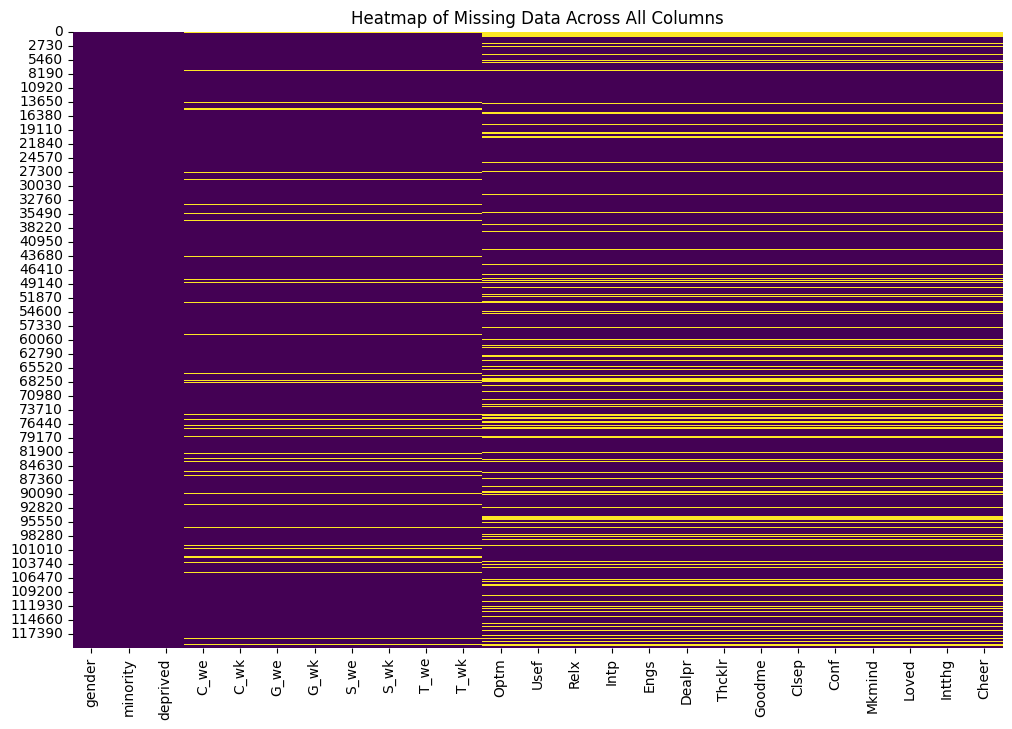

In [9]:
# Create a heatmap showing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data Across All Columns')
plt.show()

Investigating Missing Data in Screen Time and Well-being Columns
- After analyzing the missing data with a heatmap, we observed that some rows have missing values in all screen time and well-being columns.
- These columns are central to our analysis, as we are examining the relationship between screen time behavior and well-being metrics.
- Since these rows do not provide any valuable information related to screen time or well-being,
they are not useful for our analysis or predictive modeling tasks, keeping these rows would not contribute to meaningful insights
and could introduce noise or bias into our results.
- Therefore, we will proceed by removing rows that have missing values across all screen time and well-being columns, this will ensure that the remaining data is focused on observations with relevant information for the study.


In [10]:
screentime_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr',
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

null_all_cols = df[(df[screentime_columns].isna().all(axis=1)) & (df[wellbeing_columns].isna().all(axis=1))]
null_all_cols.iloc[:, 3:]

,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk,Optm,Usef,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(null_all_cols.index)

In [12]:
df.isna().sum()

gender          0
minority        0
deprived        0
C_we         4302
C_wk         4302
G_we         4302
G_wk         4302
S_we         4302
S_wk         4302
T_we         4302
T_wk         4302
Optm        15081
Usef        15081
Relx        15081
Intp        15081
Engs        15081
Dealpr      15081
Thcklr      15081
Goodme      15081
Clsep       15081
Conf        15081
Mkmind      15081
Loved       15081
Intthg      15081
Cheer       15081
dtype: int64

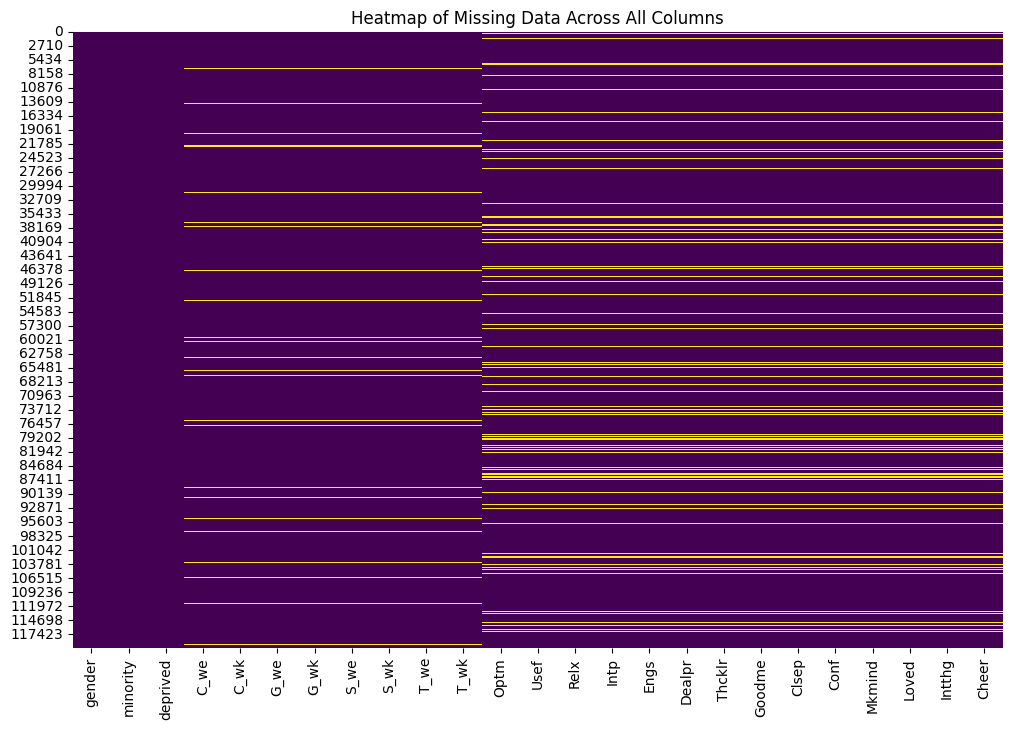

In [13]:
# Create a heatmap showing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data Across All Columns')
plt.show()

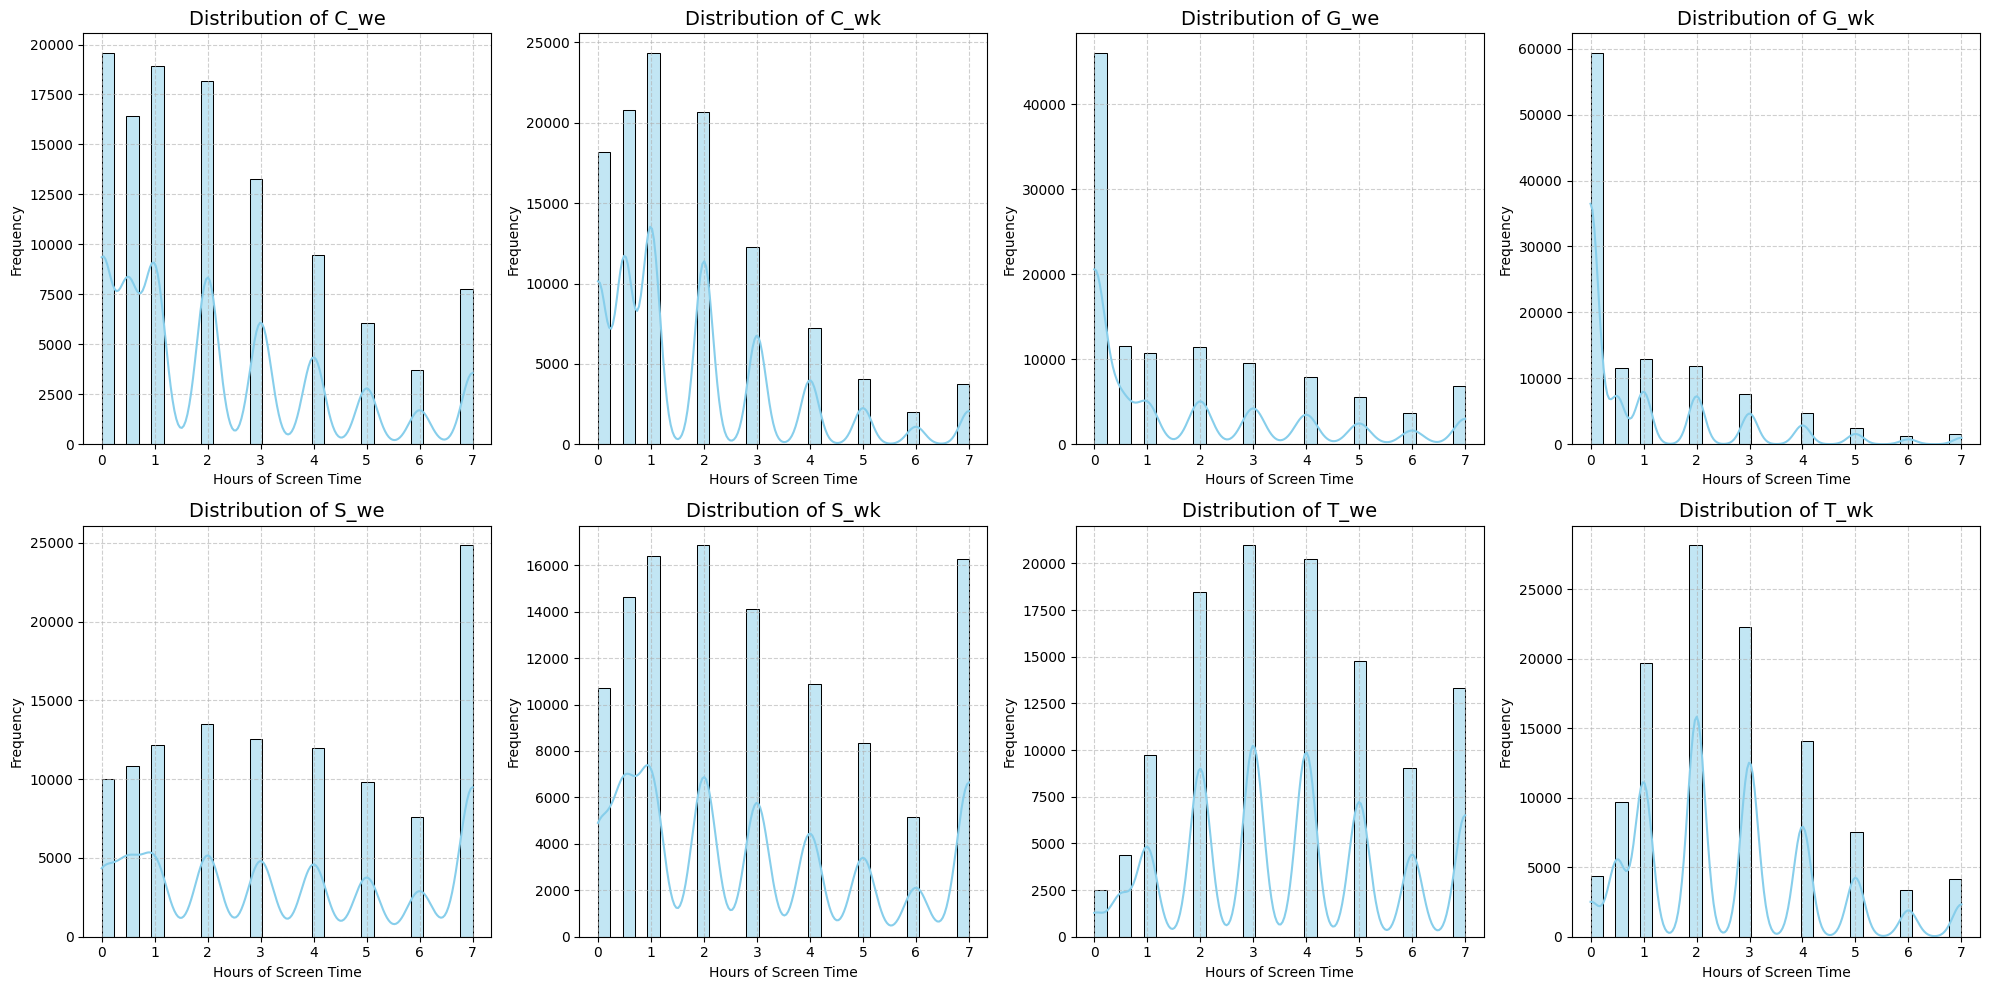

In [14]:
# Handle missing values in the screentime columns

# Set up a grid for subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each screen time column and plot histogram with KDE
for i, col in enumerate(screentime_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=30)

    # Set the title and labels
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Hours of Screen Time')
    axes[i].set_ylabel('Frequency')

    # Add gridlines for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- Since most of the screen time columns are right-skewed, median imputation may be a more appropriate choice for filling missing values, as it is less sensitive to extreme outliers.

In [15]:
# Fill missing values with the median for skewed screen time columns
for col in screentime_columns:
    df[col] = df[col].fillna(df[col].median())

In [16]:
df.isna().sum()

gender          0
minority        0
deprived        0
C_we            0
C_wk            0
G_we            0
G_wk            0
S_we            0
S_wk            0
T_we            0
T_wk            0
Optm        15081
Usef        15081
Relx        15081
Intp        15081
Engs        15081
Dealpr      15081
Thcklr      15081
Goodme      15081
Clsep       15081
Conf        15081
Mkmind      15081
Loved       15081
Intthg      15081
Cheer       15081
dtype: int64

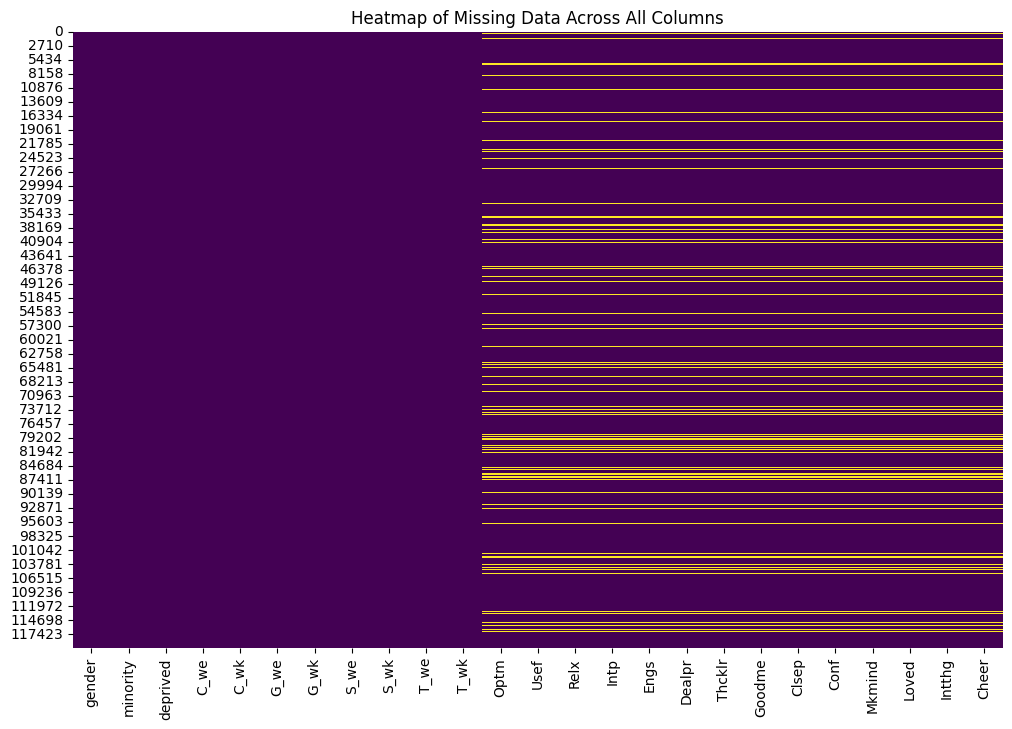

In [17]:
# Create a heatmap showing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data Across All Columns')
plt.show()

In [18]:
# Define a custom function to check for missing values, including empty strings and placeholders
def detect_missing_values(dataframe, placeholders=None):
    """
    Detect missing values in a DataFrame, including NaN, None, empty strings, and placeholders.

    Args:
    df (pd.DataFrame): The DataFrame to check for missing values.
    placeholders (list): Optional list of custom placeholders (e.g., "NA", "N/A", "null") to be considered as missing.

    Returns:
    pd.DataFrame: Boolean DataFrame where True indicates a missing value.
    """
    # List of default missing value representations
    default_placeholders = ["", " ", "  ", "   "]  # Add more if needed
    if placeholders:
        default_placeholders.extend(placeholders)

    # Step 1: Use isna() to detect standard missing values (NaN, None)
    is_na = dataframe.isna()

    # Step 2: Detect empty strings or whitespace in columns with object (string) dtype
    is_empty_string = dataframe.map(lambda x: isinstance(x, str) and x.strip() in default_placeholders)

    # Combine the results
    missing = is_na | is_empty_string

    return missing

# Example: Add any custom placeholders you want to include, if applicable
custom_placeholders = ["NA", "N/A", "null"]

# Apply the function to your DataFrame
missing_values = detect_missing_values(df, placeholders=custom_placeholders)

# View the total number of missing values in each column
missing_counts = missing_values.sum()
print(missing_counts)

gender          0
minority        0
deprived        0
C_we            0
C_wk            0
G_we            0
G_wk            0
S_we            0
S_wk            0
T_we            0
T_wk            0
Optm        15081
Usef        15081
Relx        15081
Intp        15081
Engs        15081
Dealpr      15081
Thcklr      15081
Goodme      15081
Clsep       15081
Conf        15081
Mkmind      15081
Loved       15081
Intthg      15081
Cheer       15081
dtype: int64


We can use the rows where screen time data (X) is available but well-being data (y) is missing as the test data, and the rows with both screen time and well-being data as the training data. This approach is logical because the available screen time data is useful for predictions, and using it as test data allows us to evaluate our model on these previously unknown well-being scores.

In [19]:
# Split the dataset into training and test sets
# Training data: where we have both screen time and well-being data
train_data = df.dropna(subset=wellbeing_columns)

# Test data: where screen time is present but well-being data is missing
test_data = df[df[wellbeing_columns].isna().all(axis=1)]

# Extract features (X) and target (y) for training
X = train_data.drop(wellbeing_columns, axis=1)
y = train_data[wellbeing_columns]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features (X) for the test data (no y available for test set)
X_test = test_data.drop(wellbeing_columns, axis=1)

# Print the shape of the train and test data
print(f"Training data size: {X_train.shape[0]} rows")
print(f"Validation data size: {X_val.shape[0]} rows")
print(f"Test data size: {X_test.shape[0]} rows")

Training data size: 82064 rows
Validation data size: 20516 rows
Test data size: 15081 rows


### Feature engineering

In [20]:
total_C = df['C_we'] + df['C_wk']
total_G = df['G_we'] + df['G_wk']
total_S = df['S_we'] + df['S_wk']
total_T = df['T_we'] + df['T_wk']

In [21]:
C_ratio = df['C_we'] / (df['C_wk'] + 1)
G_ratio = df['G_we'] / (df['G_wk'] + 1)
S_ratio = df['S_we'] / (df['S_wk'] + 1)
T_ratio = df['T_we'] / (df['T_wk'] + 1)

## Descriptive Analysis

### Identify outliers

In [22]:
# Function to find outliers in each column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column < lower_bound) | (column > upper_bound)]

# Function to print out the number of outliers
def print_outlier_counts(dataframe):
    # Consider all columns
    columns_to_check = dataframe.columns

    for column in columns_to_check:
        if dataframe[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
            outliers = find_outliers(dataframe[column])
            print(f"The column '{column}' has {len(outliers)} outliers.")

In [23]:
df

,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1,0,0,2.0,1.0,0.5,0.0,3.0,2.0,4.0,...,3.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0
1,0,1,0,0.5,0.5,0.0,0.0,1.0,0.5,1.0,...,4.0,4.0,5.0,5.0,3.0,4.0,5.0,5.0,4.0,4.0
2,0,0,1,1.0,0.5,0.0,0.0,2.0,2.0,3.0,...,4.0,3.0,3.0,2.0,2.0,2.0,5.0,3.0,3.0,3.0
3,0,0,1,3.0,1.0,2.0,0.0,3.0,2.0,3.0,...,2.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0
4,0,0,1,4.0,2.0,0.0,0.0,4.0,3.0,7.0,...,2.0,2.0,2.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120110,1,0,1,7.0,6.0,7.0,6.0,3.0,1.0,3.0,...,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,2.0,4.0
120111,1,0,1,3.0,4.0,7.0,7.0,6.0,7.0,7.0,...,1.0,1.0,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0
120112,1,0,1,2.0,0.0,4.0,2.0,0.0,0.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
120113,1,0,1,4.0,2.0,5.0,3.0,0.5,0.5,7.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
cleaned_df = df.dropna(subset=wellbeing_columns)

In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102580 entries, 0 to 120114
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gender    102580 non-null  int64  
 1   minority  102580 non-null  int64  
 2   deprived  102580 non-null  int64  
 3   C_we      102580 non-null  float64
 4   C_wk      102580 non-null  float64
 5   G_we      102580 non-null  float64
 6   G_wk      102580 non-null  float64
 7   S_we      102580 non-null  float64
 8   S_wk      102580 non-null  float64
 9   T_we      102580 non-null  float64
 10  T_wk      102580 non-null  float64
 11  Optm      102580 non-null  float64
 12  Usef      102580 non-null  float64
 13  Relx      102580 non-null  float64
 14  Intp      102580 non-null  float64
 15  Engs      102580 non-null  float64
 16  Dealpr    102580 non-null  float64
 17  Thcklr    102580 non-null  float64
 18  Goodme    102580 non-null  float64
 19  Clsep     102580 non-null  float64
 20  Conf     

In [26]:
print_outlier_counts(cleaned_df)

The column 'gender' has 0 outliers.
The column 'minority' has 23438 outliers.
The column 'deprived' has 0 outliers.
The column 'C_we' has 6630 outliers.
The column 'C_wk' has 8414 outliers.
The column 'G_we' has 0 outliers.
The column 'G_wk' has 14941 outliers.
The column 'S_we' has 0 outliers.
The column 'S_wk' has 0 outliers.
The column 'T_we' has 0 outliers.
The column 'T_wk' has 3441 outliers.
The column 'Optm' has 5181 outliers.
The column 'Usef' has 5358 outliers.
The column 'Relx' has 0 outliers.
The column 'Intp' has 5853 outliers.
The column 'Engs' has 0 outliers.
The column 'Dealpr' has 5735 outliers.
The column 'Thcklr' has 3665 outliers.
The column 'Goodme' has 7535 outliers.
The column 'Clsep' has 3894 outliers.
The column 'Conf' has 7105 outliers.
The column 'Mkmind' has 0 outliers.
The column 'Loved' has 0 outliers.
The column 'Intthg' has 4379 outliers.
The column 'Cheer' has 3693 outliers.


### Descriptive statistics
- Measures of Central Tendency: Mean, median
- Measures of Dispersion: Max, min, range, variance, standard deviation
- The Interquartile Range: pct25, pct75, IQR

In [27]:
# Function to list stastistics summary
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

In [28]:
# Statistics summary of the sample
sum_stats = pd.DataFrame(statistics_summary(cleaned_df))
sum_stats.iloc[:,:11]

,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk
count,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000
mean,0.475102,0.228485,0.425717,2.190159,1.735879,1.674903,0.955981,3.482945,2.852296,3.662225,2.528509
std,0.499382,0.419859,0.494454,2.026326,1.693342,2.128148,1.521055,2.440053,2.283811,1.904710,1.654196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,2.000000,1.000000,0.500000,0.000000,3.000000,2.000000,4.000000,2.000000
75%,1.000000,0.000000,1.000000,3.000000,2.000000,3.000000,1.000000,6.000000,4.000000,5.000000,3.000000
max,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
median,0.000000,0.000000,0.000000,2.000000,1.000000,0.500000,0.000000,3.000000,2.000000,4.000000,2.000000
variance,0.249383,0.176281,0.244484,4.105996,2.867408,4.529014,2.313607,5.953859,5.215793,3.627920,2.736363


Some imporant points from the statistics summary:
- Gender and Minority Composition: Slightly more females than males, and a minority group of ~22.8%.
- Screen Time Distribution: On average, participants spend more time watching TV, especially on weekends (T_we with 3.66 hours), and less time on gaming during weekdays (G_wk with 0.96 hours).
- Variability: Some screen time variables (e.g., TV watching, smartphone use) show significant variability among participants, suggesting diverse screen time habits.

In [29]:
sum_stats.iloc[:,11:25]

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
count,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000
mean,3.276087,3.107428,3.097826,3.272314,3.048050,3.369448,3.488039,3.273250,3.557116,3.308491,3.851267,3.897319,3.478748,3.496500
std,0.997897,0.953128,1.015441,1.018537,1.076483,1.049365,1.018274,1.126084,1.031297,1.115874,0.974468,1.069985,1.071329,1.012482
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
median,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
variance,0.995798,0.908452,1.031121,1.037417,1.158816,1.101167,1.036882,1.268065,1.063574,1.245175,0.949588,1.144868,1.147746,1.025120


Some imporant points from the statistics summary:
- Moderate Well-being: The average scores for all well-being indicators hover around 3 to 4, suggesting that participants generally feel moderate levels of well-being in all areas.
- Variation: Some well-being indicators (e.g., Confidence, Feeling Good about Oneself) show more variability in responses, while others (e.g., Optimism, Loved) are more consistent.
- Consistency across Indicators: Overall, the distribution of well-being scores is fairly consistent across the indicators, with most participants reporting moderate levels of well-being.

#### Histograms

In [30]:
def plot_hist(sample):
    # Determine the number of rows and columns for your subplot grid
    n_rows = 6
    n_cols = 4

    # Exclude the first 3 columns assuming they are categorical
    sample_numerical = sample.iloc[:, 3:]

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    # Plot histograms in all subplots using for loop
    for i, col in enumerate(sample_numerical.columns):
        row = i // n_cols
        col_idx = i % n_cols

        if col in screentime_columns:
            bins = 8
        elif col in wellbeing_columns:
            bins = 5
        else:
            bins = 10

        axs[row, col_idx].hist(sample_numerical[sample_numerical.columns[i]], bins=bins, alpha=0.7, edgecolor='black')
        axs[row, col_idx].set_title(sample_numerical.columns[i])

    # Delete subplots that are not needed
    if len(sample_numerical.columns) < n_rows*n_cols:
        for i in range(1, n_rows*n_cols - len(sample_numerical.columns) + 1):  # Iterate over the last subplots that are not needed
            fig.delaxes(axs.flat[-i])  # Delete the subplot

    plt.tight_layout()
    plt.show()

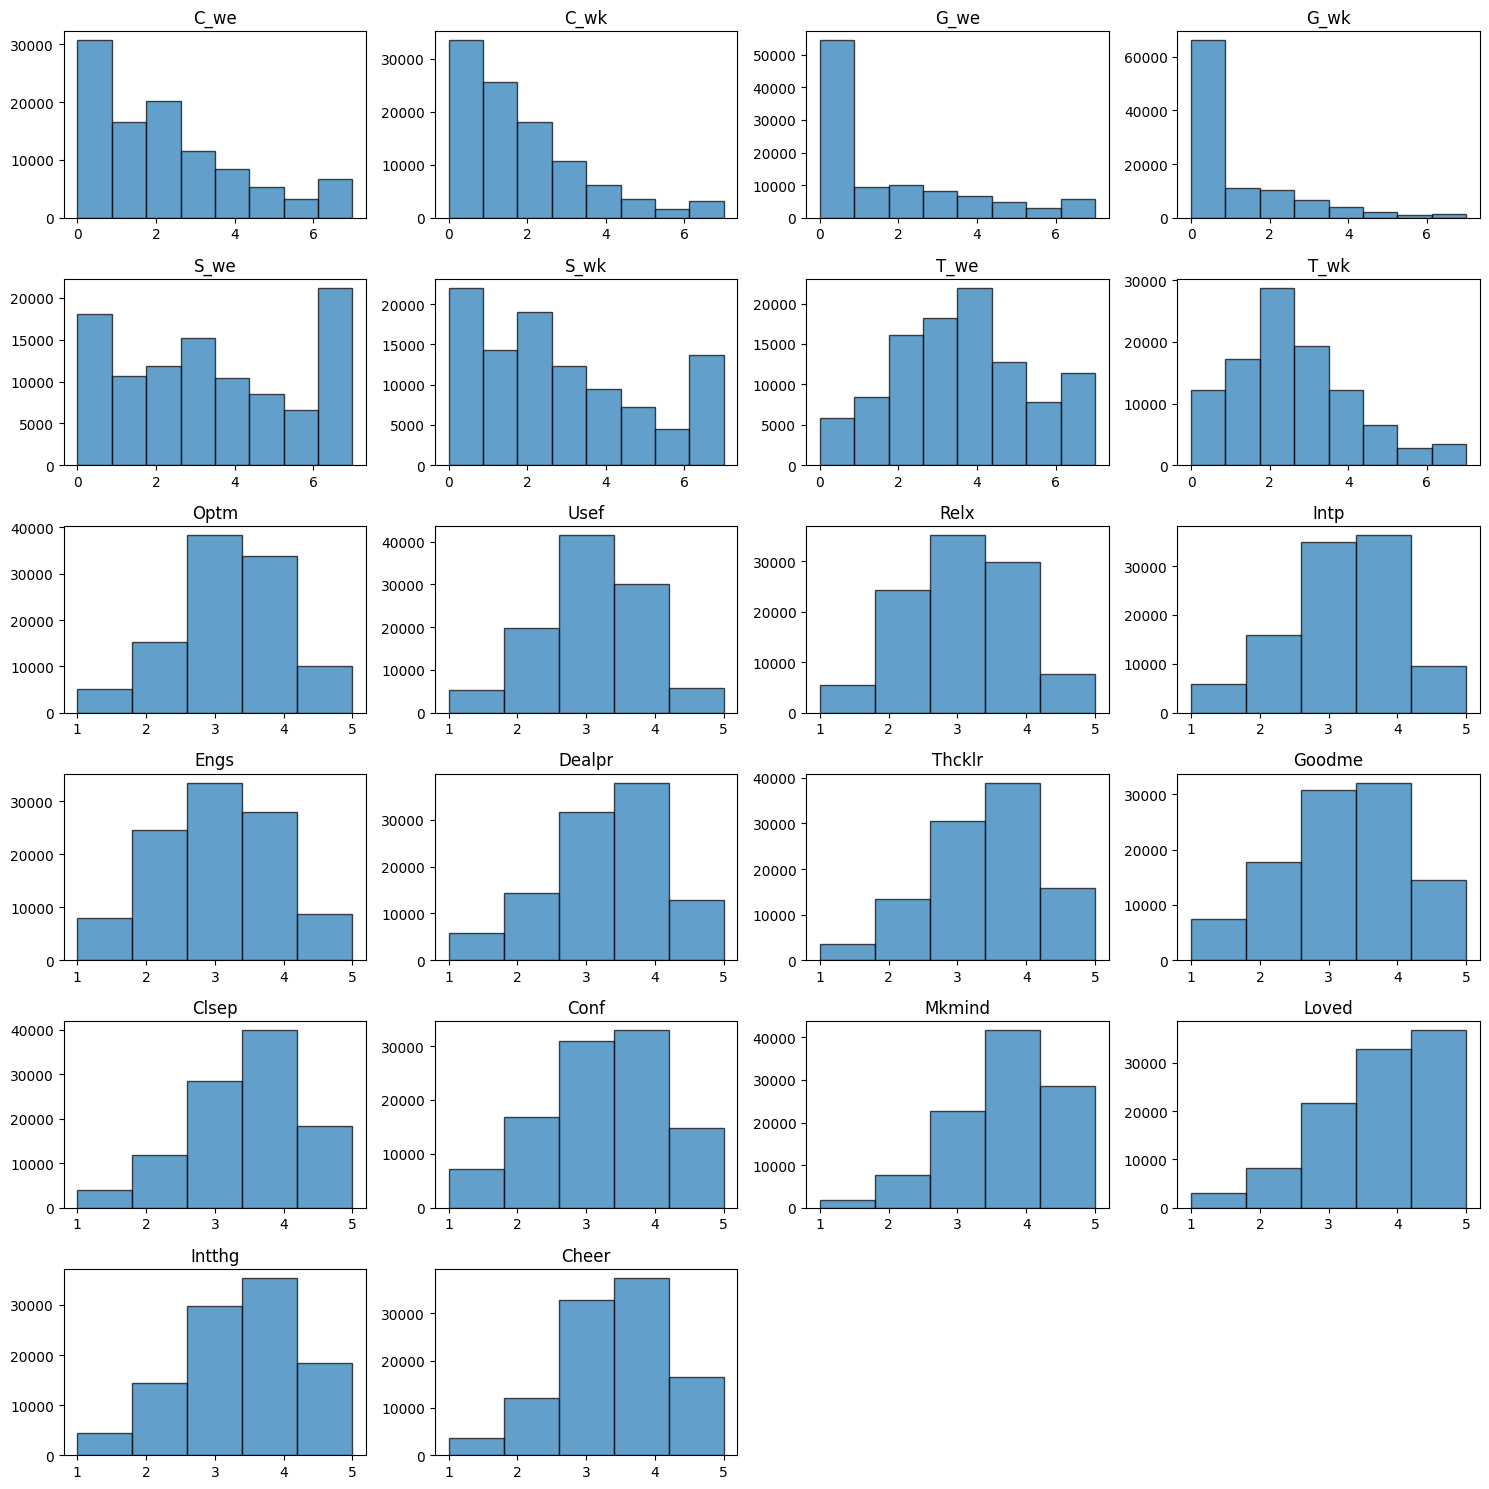

In [31]:
# Plot histograms for sample
plot_hist(cleaned_df)

Most data sets aren't shaped like a normal distribution. But we shouldn't just depend on histograms to figure this out; it's important to run a normality test as well.

In [32]:
# Function to test normality
def normality_test(sample):
    # D'Agostino's K^2 test:
    for column in sample.columns:
        data = sample[column]
        k2, p = st.normaltest(data)

        print('Column:', column)
        print('k2 =', k2)
        print('p =', p)

        # If p < 0.05, conclude that the data does not follow a normal distribution
        if p < 0.05:
            print('Data is not normally distributed.\n')
        else:
            print('Data is normally distributed.\n')

In [33]:
# Check if data of sample is normally distributed
normality_test(cleaned_df)

Column: gender
k2 = 351748.200672692
p = 0.0
Data is not normally distributed.

Column: minority
k2 = 18204.727720767663
p = 0.0
Data is not normally distributed.

Column: deprived
k2 = 370751.73509213846
p = 0.0
Data is not normally distributed.

Column: C_we
k2 = 11430.558722109277
p = 0.0
Data is not normally distributed.

Column: C_wk
k2 = 22125.06245663029
p = 0.0
Data is not normally distributed.

Column: G_we
k2 = 16231.256623641779
p = 0.0
Data is not normally distributed.

Column: G_wk
k2 = 36759.44439033739
p = 0.0
Data is not normally distributed.

Column: S_we
k2 = 3493649.4246054622
p = 0.0
Data is not normally distributed.

Column: S_wk
k2 = 19643.223469575503
p = 0.0
Data is not normally distributed.

Column: T_we
k2 = 8751.657067255444
p = 0.0
Data is not normally distributed.

Column: T_wk
k2 = 8632.747922365903
p = 0.0
Data is not normally distributed.

Column: Optm
k2 = 1770.4349608824123
p = 0.0
Data is not normally distributed.

Column: Usef
k2 = 1156.3119557983587

We recognize that our dataset does not follow a normal distribution, which is usually a basic requirement for using a t-test. However, we're using this method to keep things similar to a lot of research in this area that have mainly used t-statistics. Readers should note that this violation of assumptions may impact the accuracy of our results, and therefore interpret findings with caution.

### Inferential statistics

In [34]:
# Function to calculate confidence interval of data from each column in a sample
def confidence_interval(samp):
    samp = samp.drop(['gender', 'minority', 'deprived'], axis=1)
    # Iterate over each column in the DataFrame
    for i in range(0, len(samp.columns)):
        # Select the current column
        sample = samp.iloc[:, i]
        column_name = samp.columns[i]  # Get column name

        # Sample mean, standard deviation, and sample size
        x_bar = sample.mean()
        s = sample.std()
        n = sample.shape[0]

        # Standard error
        std_err = s / math.sqrt(n)

        # Confidence level, significance level, and degrees of freedom
        conf_lvl = 0.95  # we choose confidence level = 0.95
        sig_lvl = 1 - conf_lvl
        df = n - 1

        # Confidence interval with t-distribution
        ci_low_t, ci_upp_t = stm._tconfint_generic(x_bar, std_err, df, alpha=sig_lvl, alternative="two-sided")
        print(f"C.I. for column {column_name} (t*): {ci_low_t:.5f} to {ci_upp_t:.5f}. Interval size: {ci_upp_t - ci_low_t:.5f}.")

In [35]:
confidence_interval(cleaned_df)

C.I. for column C_we (t*): 2.17776 to 2.20256. Interval size: 0.02480.
C.I. for column C_wk (t*): 1.72552 to 1.74624. Interval size: 0.02073.
C.I. for column G_we (t*): 1.66188 to 1.68793. Interval size: 0.02605.
C.I. for column G_wk (t*): 0.94667 to 0.96529. Interval size: 0.01862.
C.I. for column S_we (t*): 3.46801 to 3.49788. Interval size: 0.02986.
C.I. for column S_wk (t*): 2.83832 to 2.86627. Interval size: 0.02795.
C.I. for column T_we (t*): 3.65057 to 3.67388. Interval size: 0.02331.
C.I. for column T_wk (t*): 2.51839 to 2.53863. Interval size: 0.02025.
C.I. for column Optm (t*): 3.26998 to 3.28219. Interval size: 0.01221.
C.I. for column Usef (t*): 3.10160 to 3.11326. Interval size: 0.01167.
C.I. for column Relx (t*): 3.09161 to 3.10404. Interval size: 0.01243.
C.I. for column Intp (t*): 3.26608 to 3.27855. Interval size: 0.01247.
C.I. for column Engs (t*): 3.04146 to 3.05464. Interval size: 0.01318.
C.I. for column Dealpr (t*): 3.36303 to 3.37587. Interval size: 0.01284.
C.I.

### Exploratory Data Analysis

#### Compare values of Well-being metrics among groups based on 'gender', 'minority' and 'deprived'

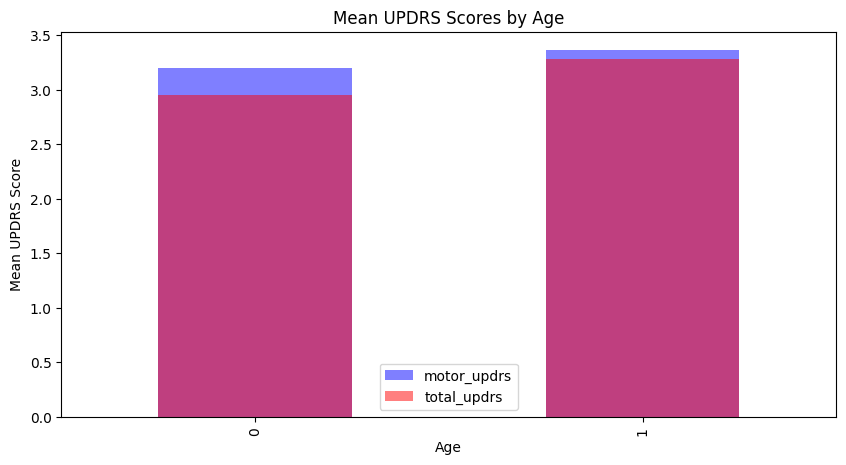

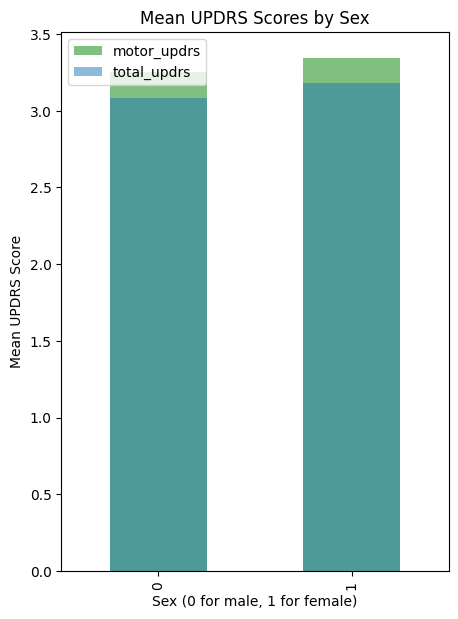

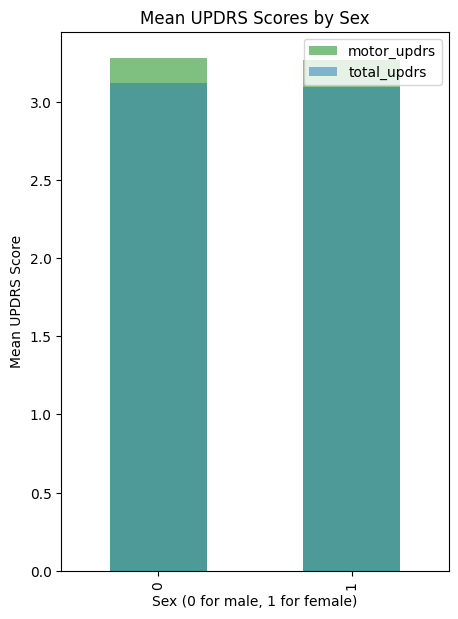

In [36]:
# Analysis based on gender
grouped_by_gender = cleaned_df.groupby('gender')[['Optm', 'Usef']].mean()

# Plotting the graph
plt.figure(figsize=(10, 5))
grouped_by_gender['Optm'].plot(kind='bar', alpha=0.5, color='blue', label='motor_updrs')
grouped_by_gender['Usef'].plot(kind='bar', alpha=0.5, color='red', label='total_updrs')
plt.title('Mean UPDRS Scores by Age')
plt.xlabel('Age')
plt.ylabel('Mean UPDRS Score')
plt.legend()
plt.show()

# Analysis based on minority
grouped_by_minority = cleaned_df.groupby('minority')[['Optm', 'Usef']].mean()

# Plotting the graph
plt.figure(figsize=(5, 7))
grouped_by_minority['Optm'].plot(kind='bar', alpha=0.5, color='green', label='motor_updrs')
grouped_by_minority['Usef'].plot(kind='bar', alpha=0.5, label='total_updrs')
plt.title('Mean UPDRS Scores by Sex')
plt.xlabel('Sex (0 for male, 1 for female)')
plt.ylabel('Mean UPDRS Score')
plt.legend()
plt.show()

# Analysis based on deprived
grouped_by_deprived = cleaned_df.groupby('deprived')[wellbeing_columns].mean()

# Plotting the graph
plt.figure(figsize=(5, 7))
grouped_by_deprived['Optm'].plot(kind='bar', alpha=0.5, color='green', label='motor_updrs')
grouped_by_deprived['Usef'].plot(kind='bar', alpha=0.5, label='total_updrs')
plt.title('Mean UPDRS Scores by Sex')
plt.xlabel('Sex (0 for male, 1 for female)')
plt.ylabel('Mean UPDRS Score')
plt.legend()
plt.show()

#### Distribution of categorical variables

Distribution of 'gender', 'minority' and 'deprived'

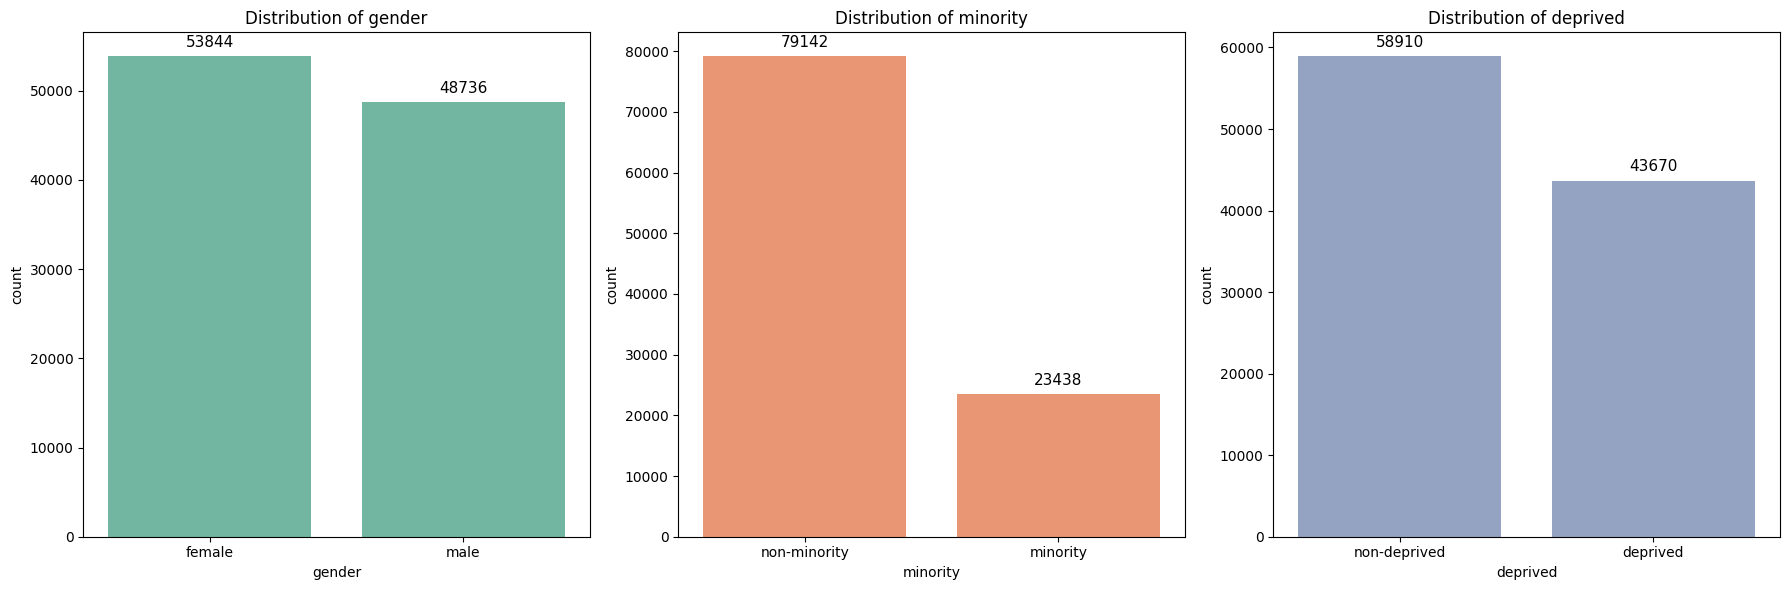

In [37]:
demographic_columns = ['gender', 'minority', 'deprived']

# Create a figure with subplots for each demographic column
fig, axs = plt.subplots(1, len(demographic_columns), figsize=(18, 6))

# Define a color palette for the plots (setting specific colors manually)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # A color for each plot

# Define the group names for each demographic column
group = {
    'gender': {
        0: 'female',
        1: 'male'
    },
    'minority': {
        0: 'non-minority',
        1: 'minority'
    },
    'deprived': {
        0: 'non-deprived',
        1: 'deprived'
    }
}

# Loop through each demographic column and corresponding axis
for i, col in enumerate(demographic_columns):
    # Plot the countplot on the respective axis with specific colors
    ax = sns.countplot(data=cleaned_df, x=col, ax=axs[i], color=colors[i])

    # Set title and labels
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    # axs[i].set_ylim(0, 90000)

    # Rename the ticks on the x-axis
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels([group[col][0], group[col][1]])

    # Annotate the bars with their values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Adjust the layout for a clean design
plt.tight_layout()
plt.show()


- The **female** group has a slightly higher number of samples compared to the **male** group, indicating a relatively balanced gender distribution with a small majority of females.
- The **non-minority** group is significantly larger than the **minority** group, with roughly **three times** as many samples in the non-minority group compared to the minority group.
- The **non-deprived** group has a higher number of samples compared to the **deprived** group, though the difference is less extreme compared to the minority distribution.

#### Distribution of key continuous variables

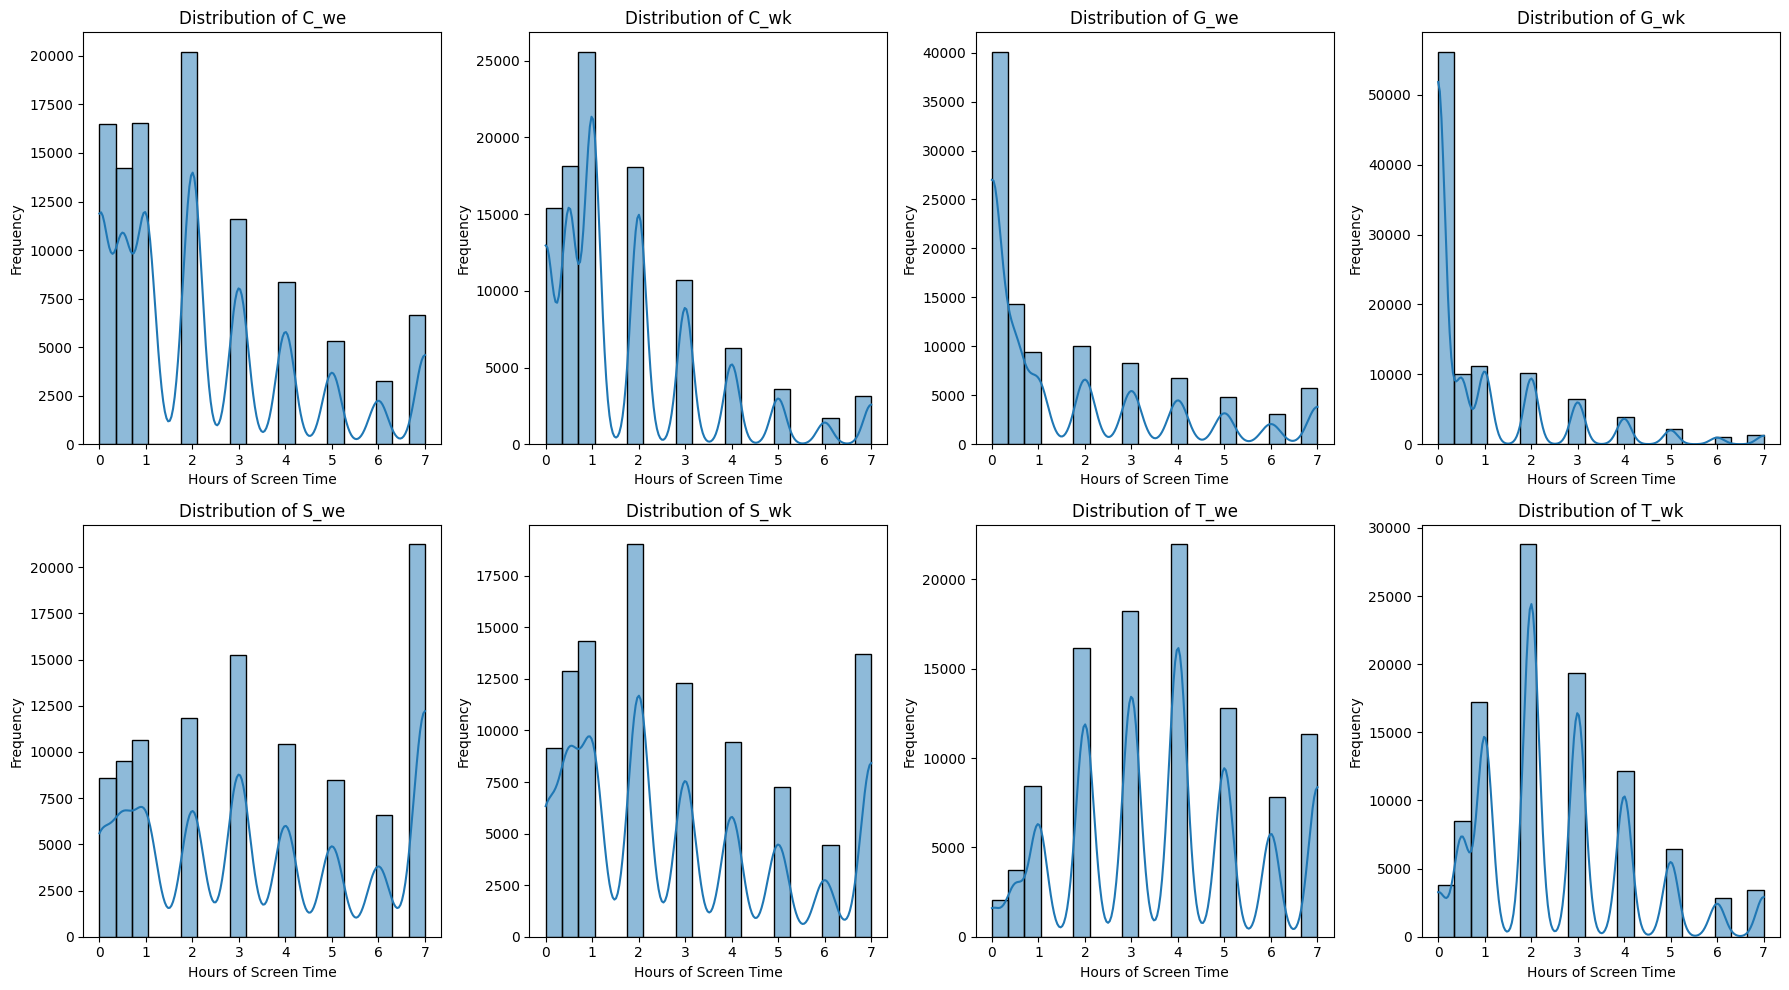

In [38]:
# Create a figure with subplots for each screen time column
fig, axs = plt.subplots(2, 4, figsize=(18, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each screen time column and plot its distribution in a subplot
for i, col in enumerate(screentime_columns):
    sns.histplot(data=cleaned_df, x=col, ax=axs[i], kde=True, bins=20)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel('Hours of Screen Time')
    axs[i].set_ylabel('Frequency')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

- Computer and Gaming: Screen time for both activities tends to be concentrated at lower levels, with most participants using these devices for less than 2 hours.
- Smartphone and TV: These activities show a more diverse range of usage, with many participants using smartphones and watching TV for longer durations, particularly during weekends.
- Weekday vs. Weekend: While screen time is generally higher on weekends compared to weekdays, the difference is most pronounced for activities like gaming and TV watching.

#### Check Well-being scores by Gender

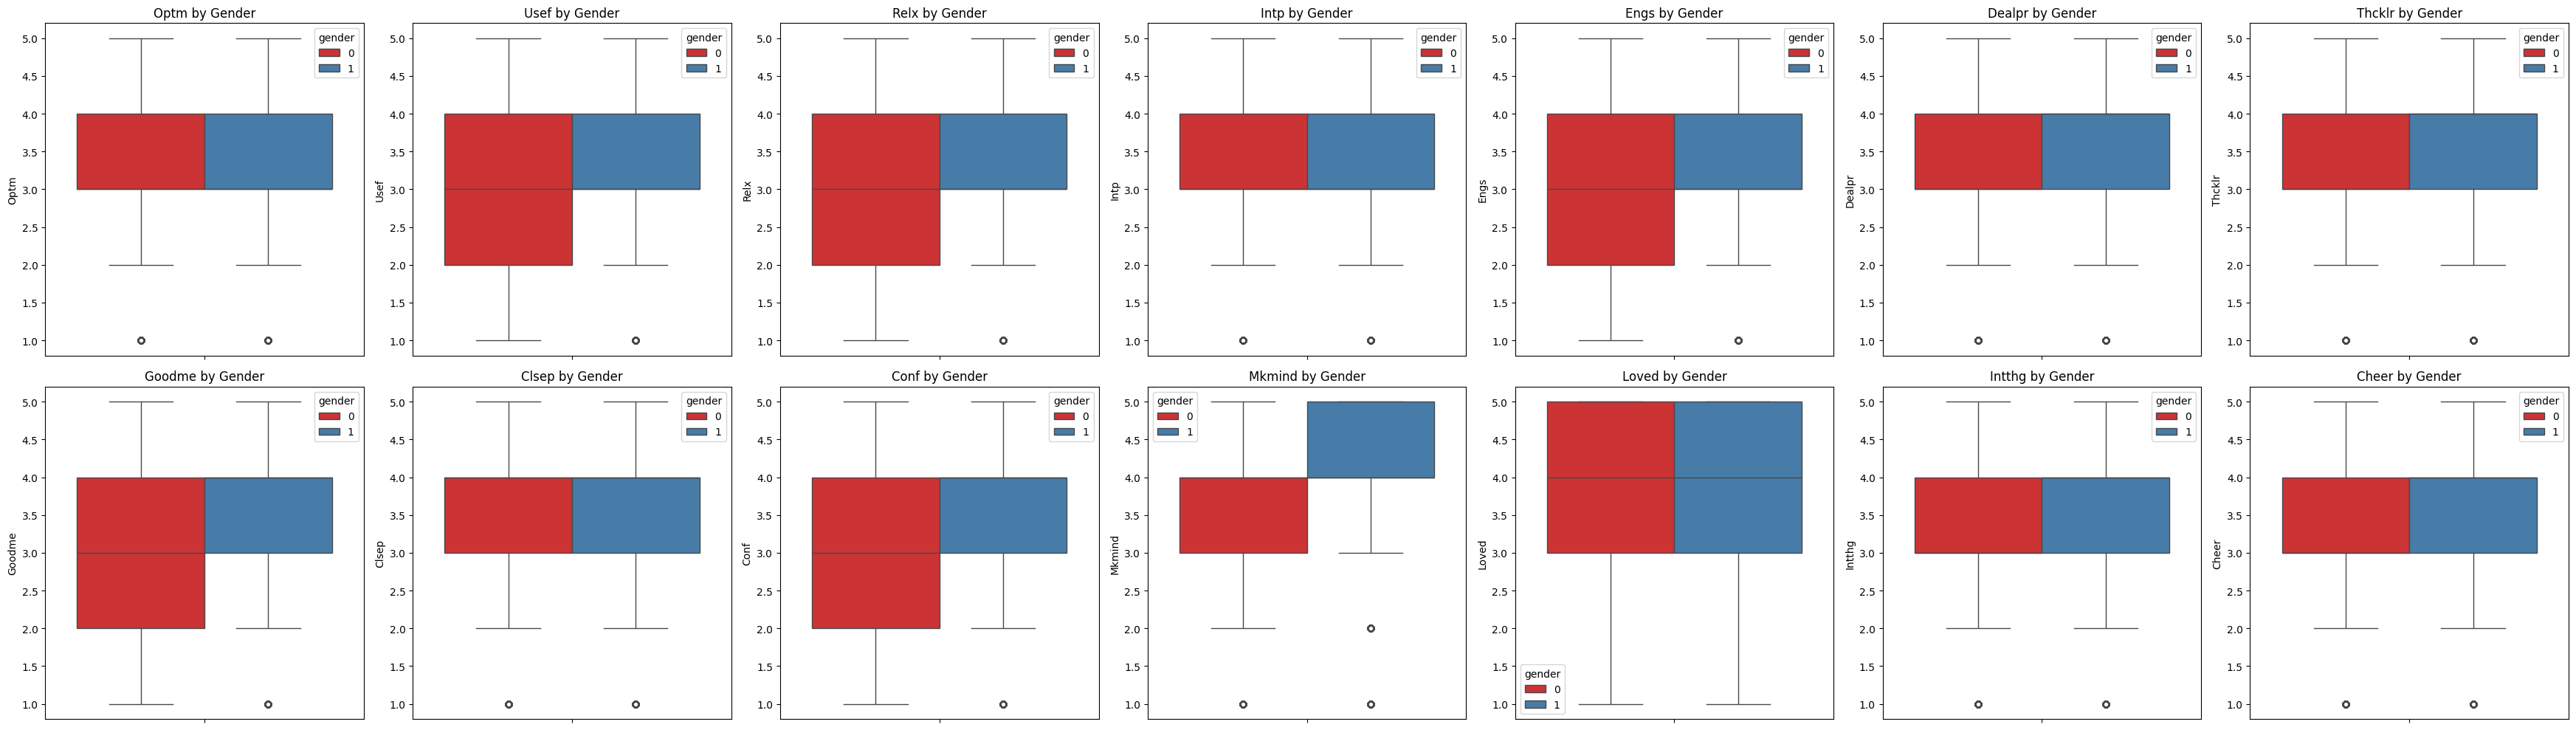

In [39]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 7, figsize=(35, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by gender
for i, col in enumerate(wellbeing_columns):
    sns.boxplot(data=cleaned_df, hue='gender', y=col, ax=axs[i], palette='Set1')
    axs[i].set_title(f'{col} by Gender')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Check Well-being scores by Minority

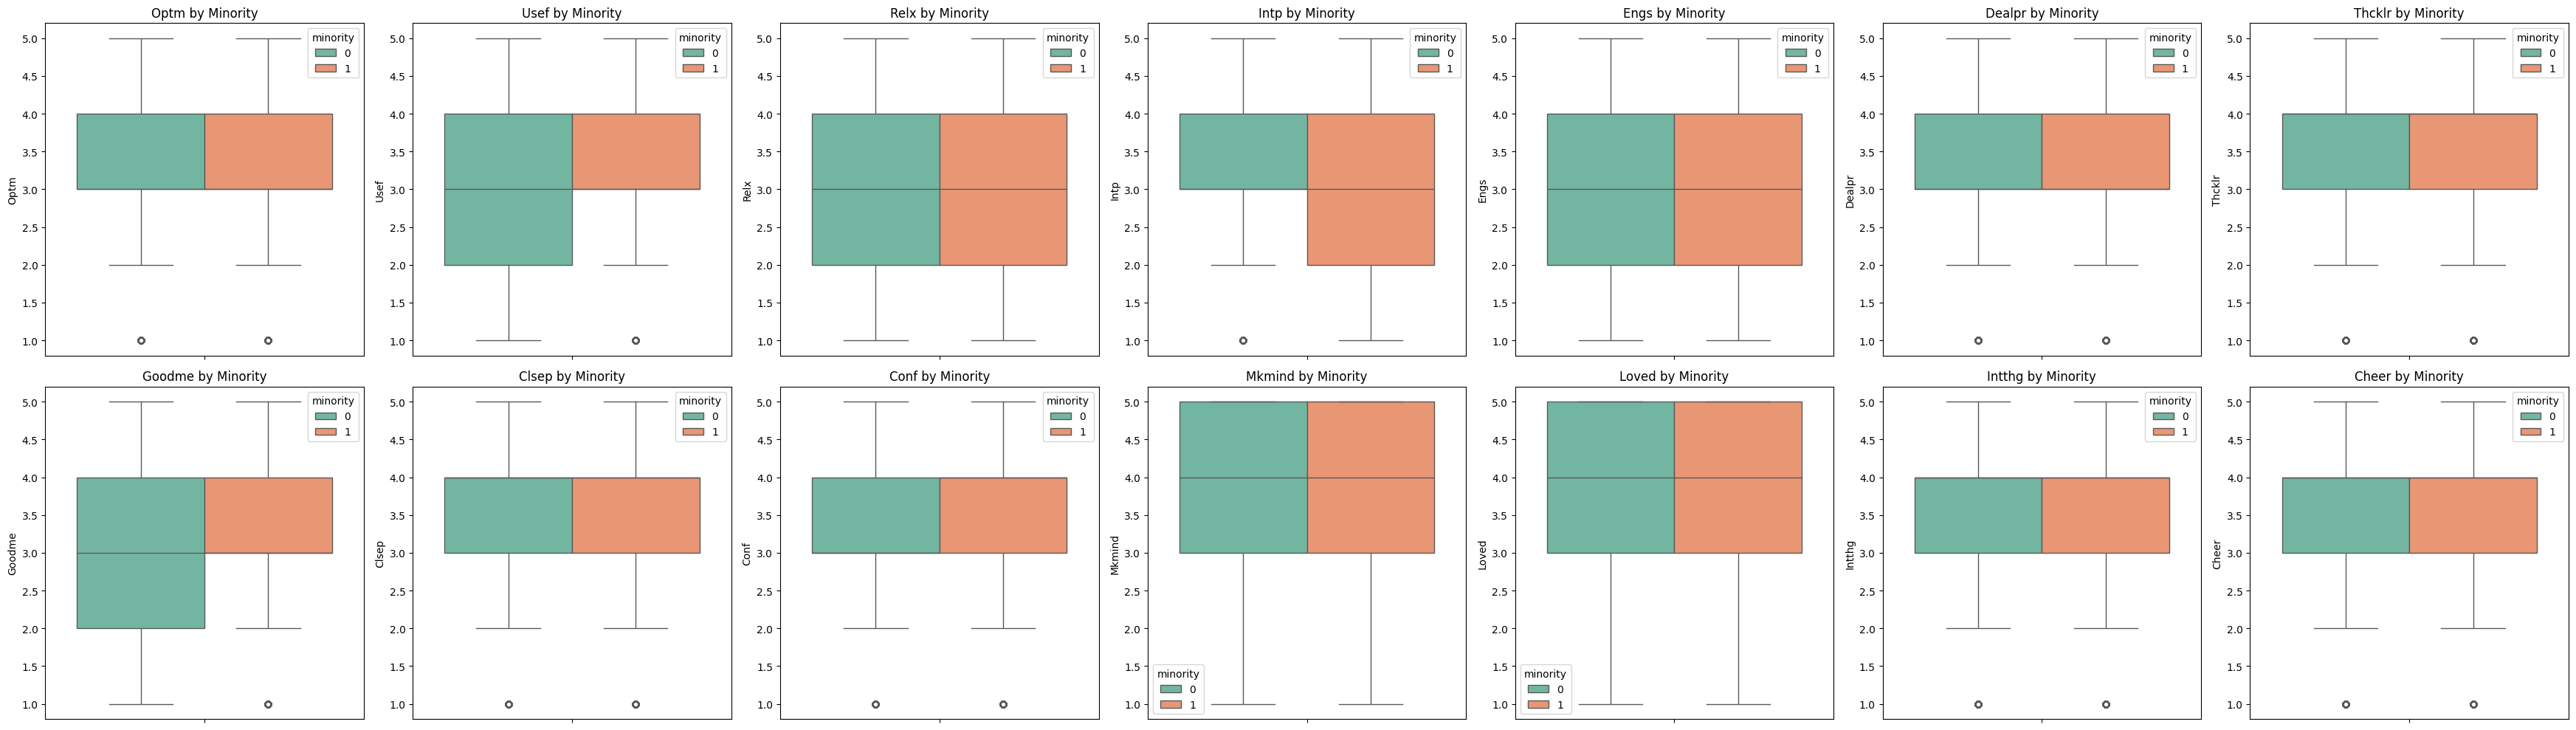

In [40]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 7, figsize=(35, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by minority
for i, col in enumerate(wellbeing_columns):
    sns.boxplot(data=cleaned_df, hue='minority', y=col, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{col} by Minority')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Check Well-being scores by Deprived

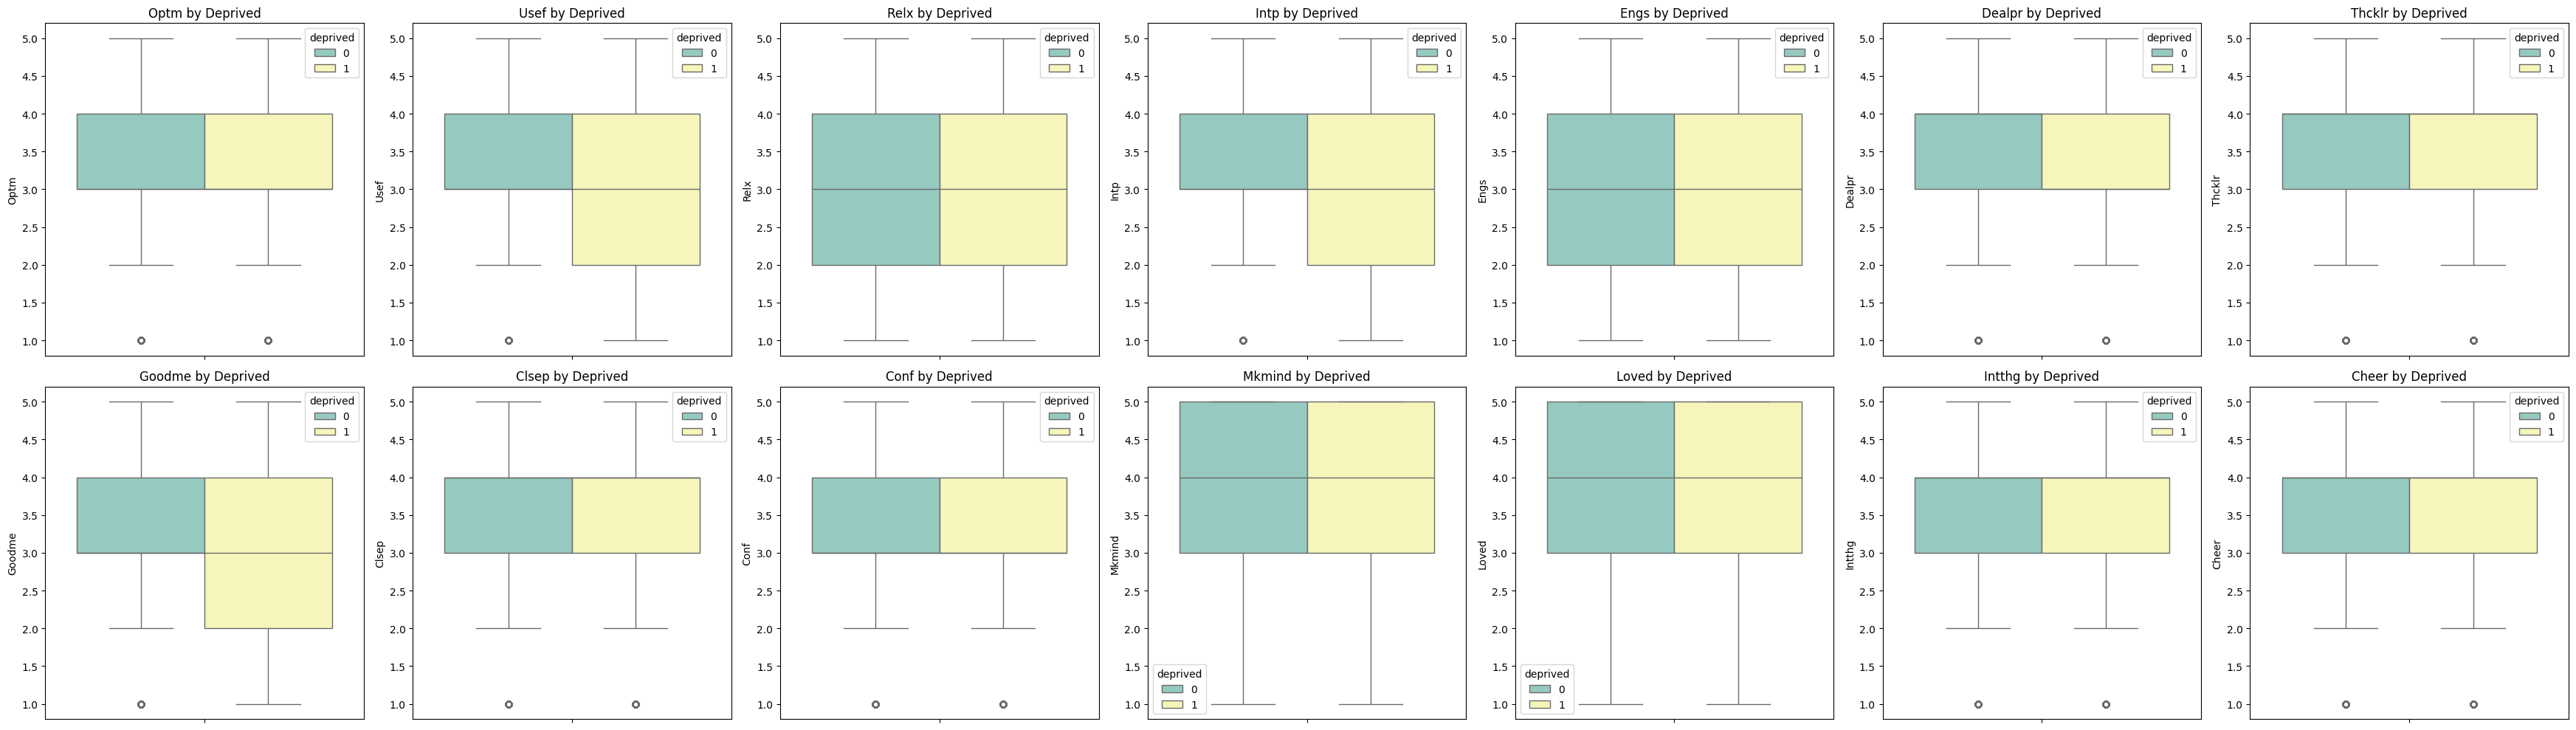

In [41]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 7, figsize=(35, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by deprived
for i, col in enumerate(wellbeing_columns):
    sns.boxplot(data=cleaned_df, hue='deprived', y=col, ax=axs[i], palette='Set3')
    axs[i].set_title(f'{col} by Deprived')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Check Screen time data by Gender

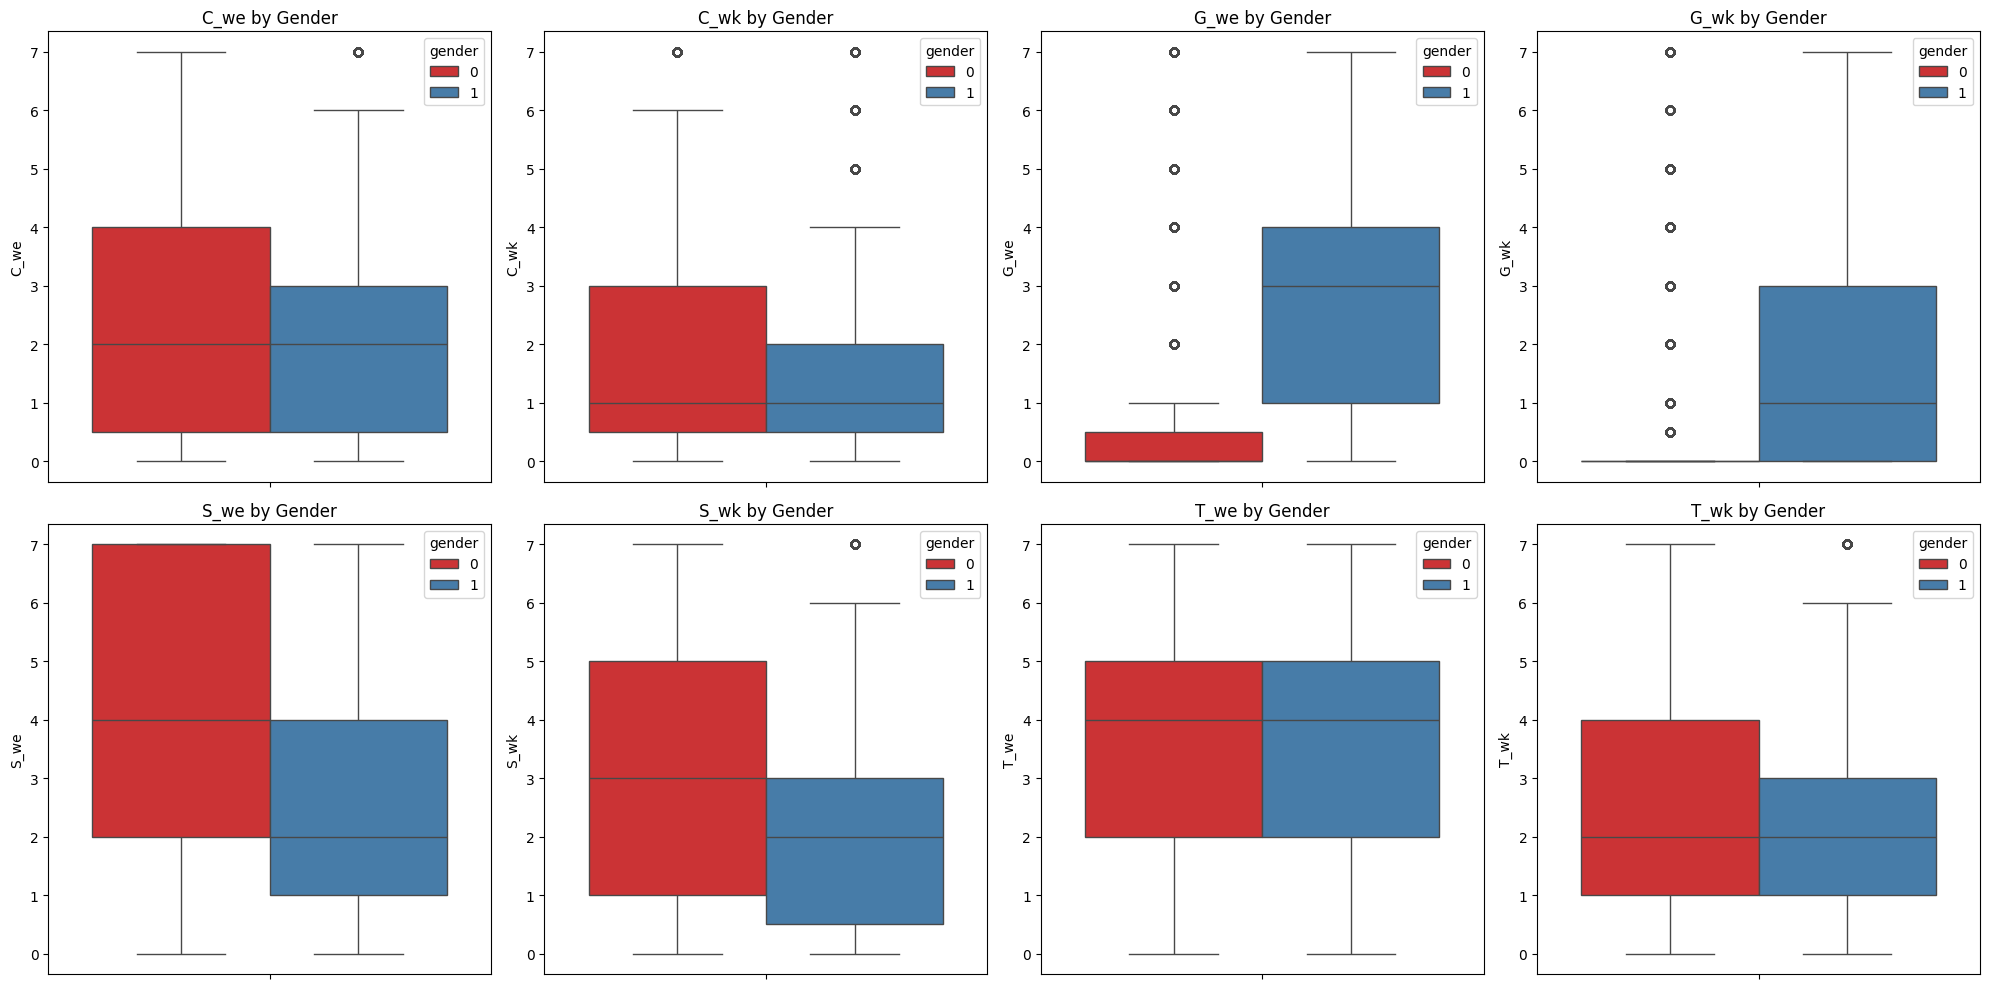

In [42]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by gender
for i, col in enumerate(screentime_columns):
    sns.boxplot(data=cleaned_df, hue='gender', y=col, ax=axs[i], palette='Set1')
    axs[i].set_title(f'{col} by Gender')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Check Screen time data by Minority

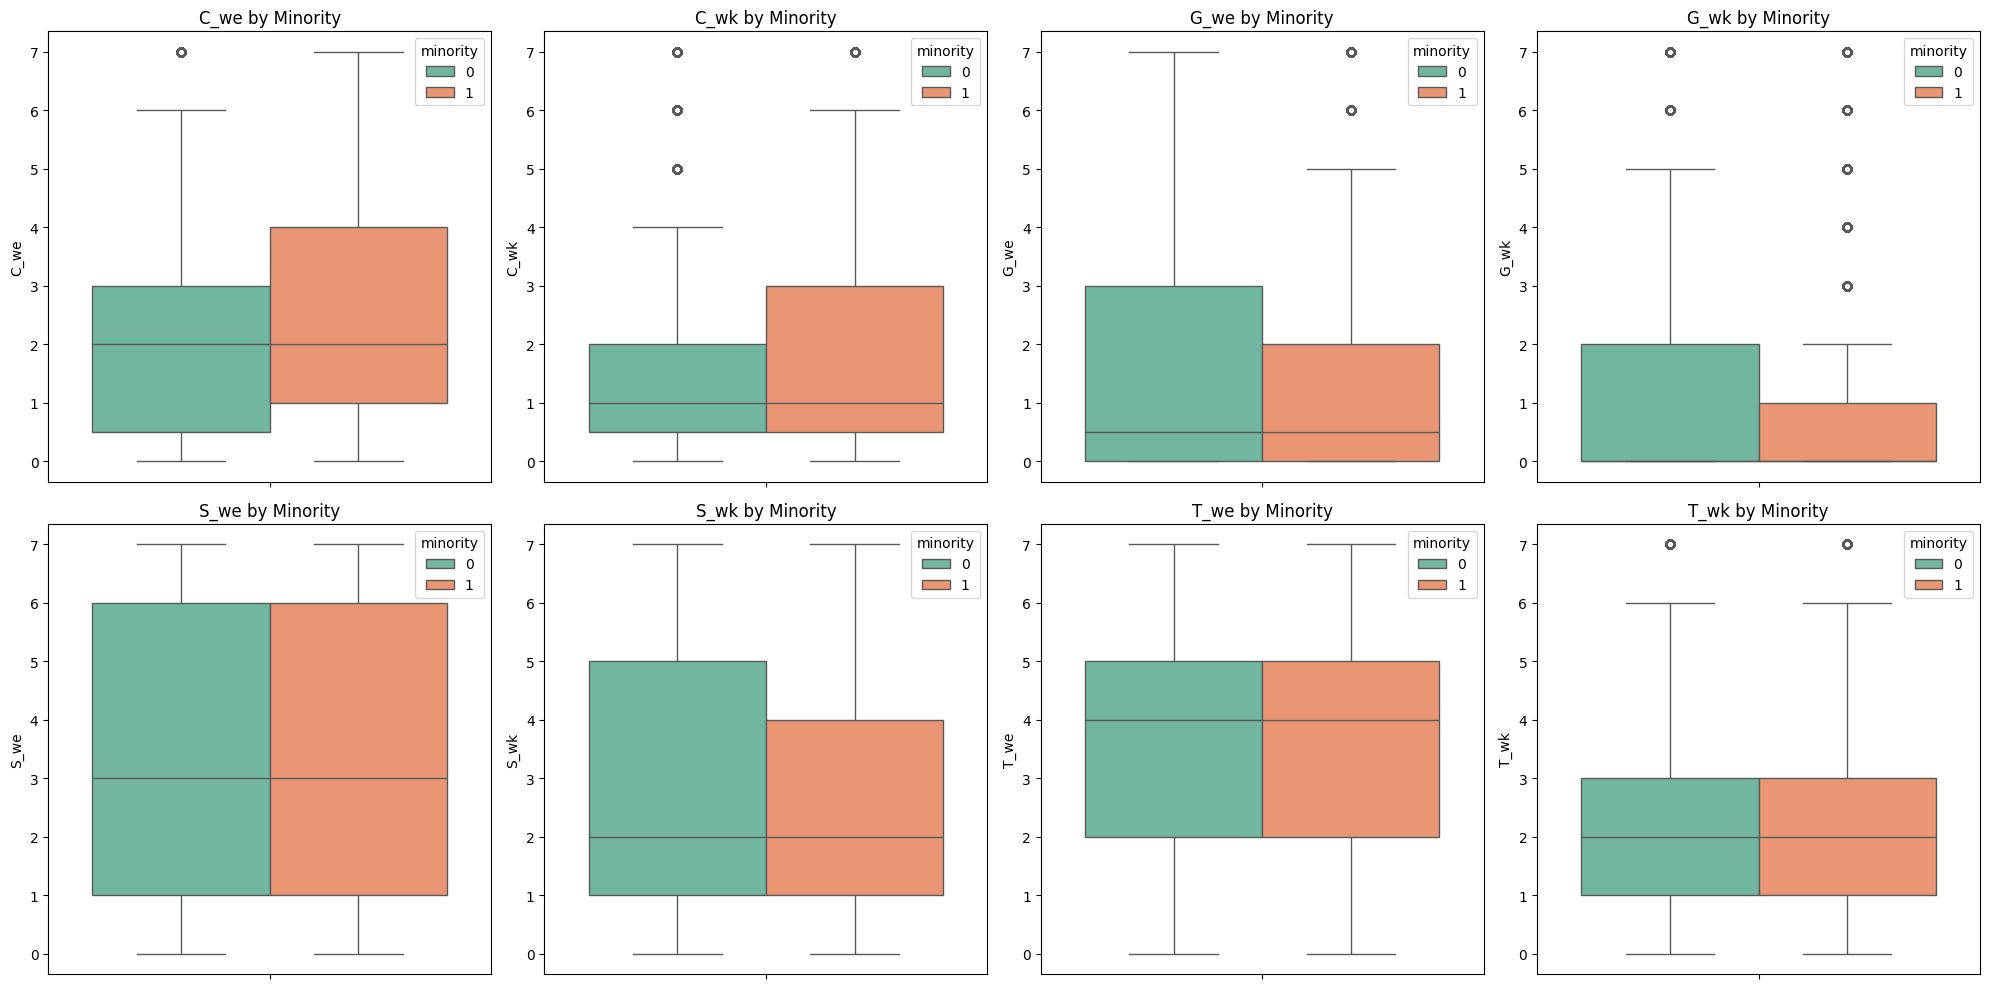

In [43]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by gender
for i, col in enumerate(screentime_columns):
    sns.boxplot(data=cleaned_df, hue='minority', y=col, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{col} by Minority')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Check Screen time data by Deprived

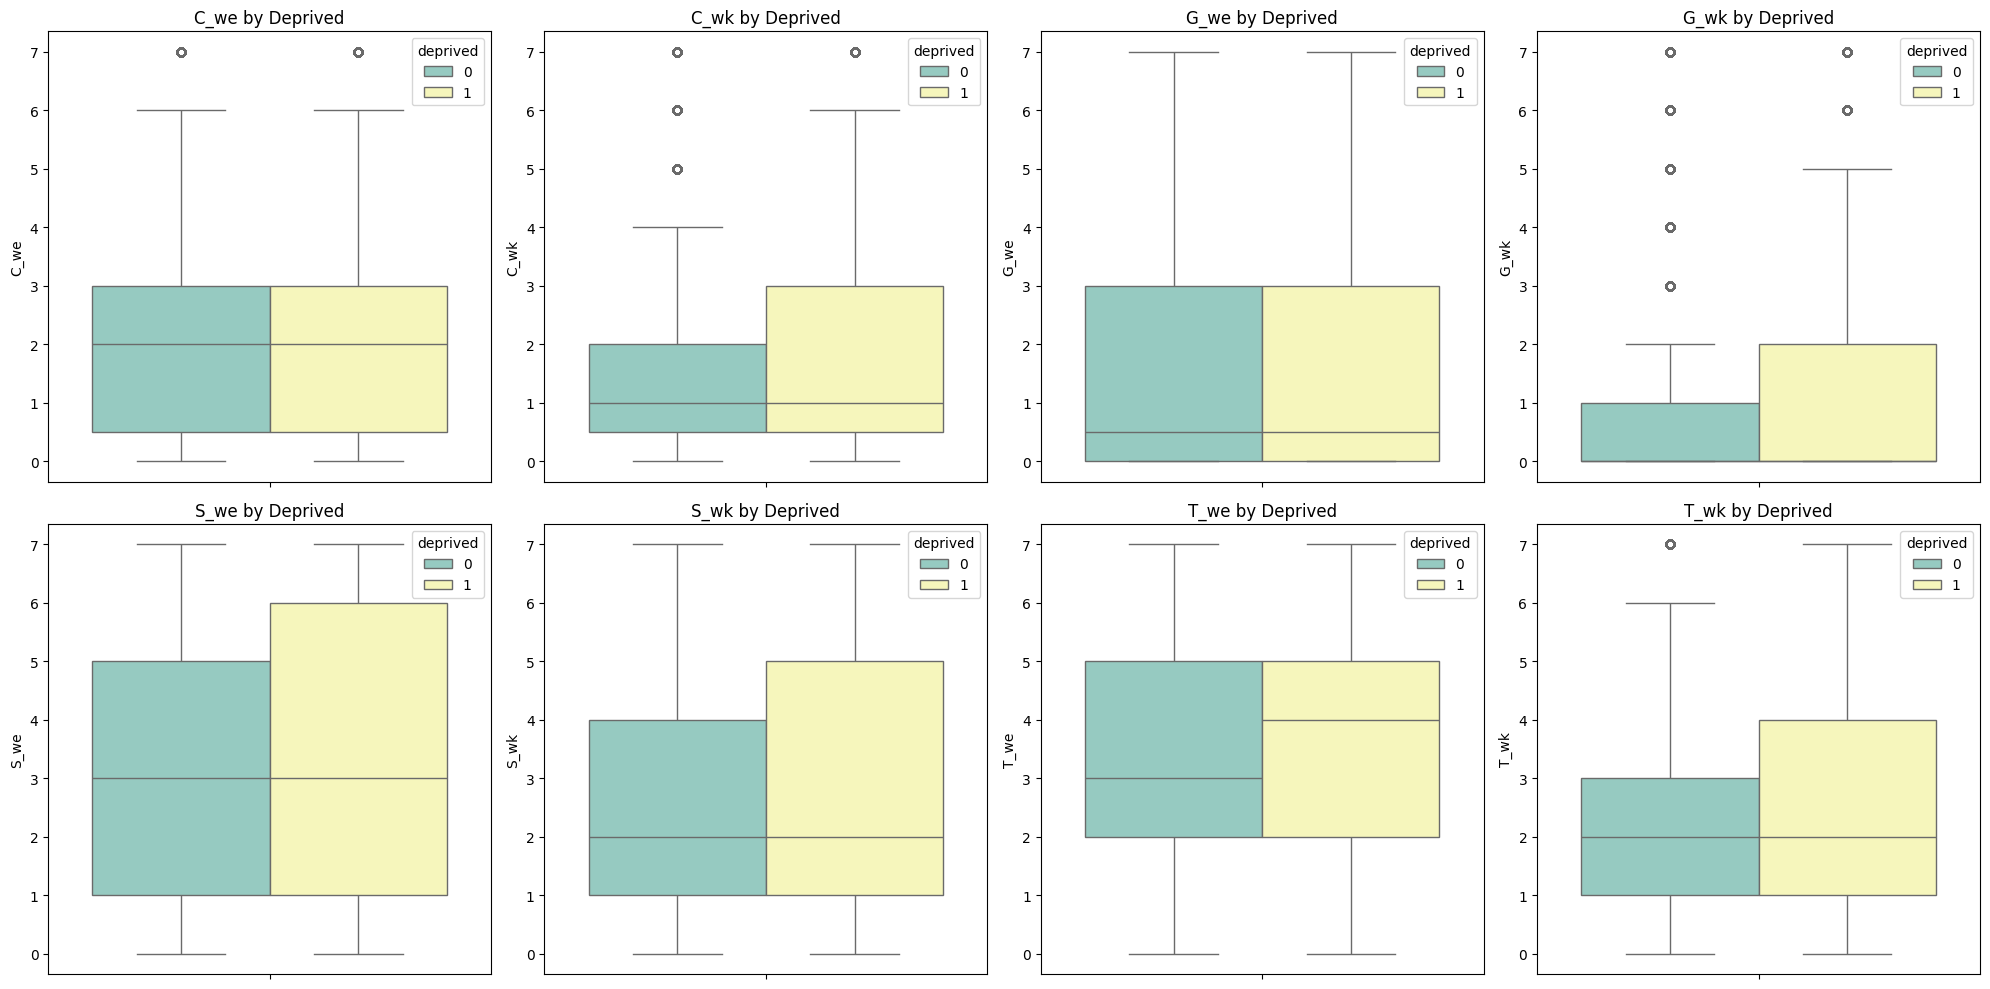

In [44]:
# Create a figure with subplots for each well-being score
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each well-being column and create a boxplot by gender
for i, col in enumerate(screentime_columns):
    sns.boxplot(data=cleaned_df, hue='deprived', y=col, ax=axs[i], palette='Set3')
    axs[i].set_title(f'{col} by Deprived')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

#### Draw heatmap to check the relationships between features and Well-being scores

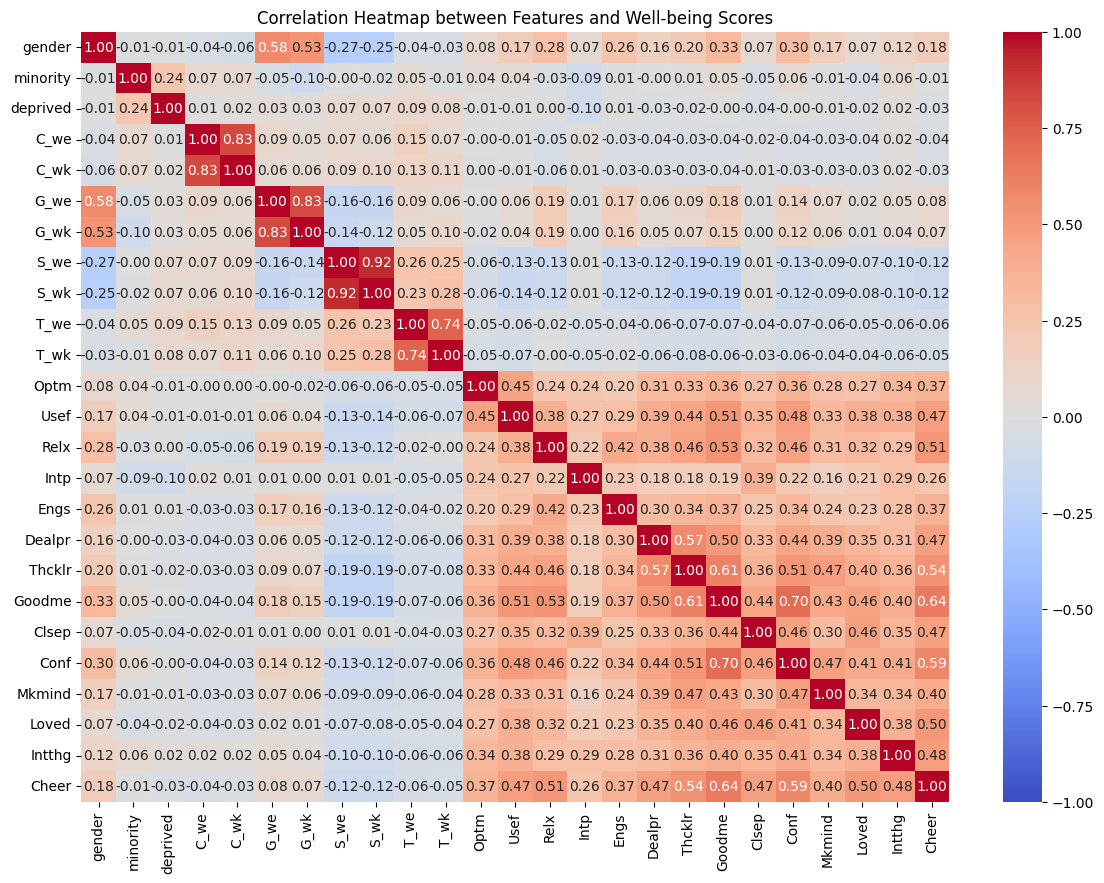

In [45]:
# Create a DataFrame containing all the selected columns
selected_columns = demographic_columns + screentime_columns + wellbeing_columns
subset_df = cleaned_df[selected_columns]

# Compute the Spearman correlation matrix (Spearman is suitable for ordinal data)
corr_matrix = subset_df.corr(method='spearman')

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap between Features and Well-being Scores')
plt.show()

- Strong correlations among well-being scores suggest that different aspects of well-being (e.g., feeling relaxed, feeling confident) are closely related.
- Screen time has a generally weak relationship with well-being, though some negative associations (especially with smartphone use) are worth further exploration.
- Gender shows some moderate correlations with well-being scores, especially in areas like confidence and relaxation, whereas minority and deprivation status show weaker relationships.

In [57]:
# Calculate the correlation matrix
corr_matrix = cleaned_df.corr()

for _, col in enumerate(wellbeing_columns):
    # Get the top 5 variables for each well-being indicator
    print(f"{col}: {corr_matrix[col].drop(wellbeing_columns).abs().nlargest(5).index.tolist()}")

Optm: ['gender', 'S_wk', 'S_we', 'T_wk', 'T_we']
Usef: ['gender', 'S_wk', 'S_we', 'T_wk', 'T_we']
Relx: ['gender', 'G_we', 'G_wk', 'S_we', 'S_wk']
Intp: ['deprived', 'minority', 'gender', 'T_wk', 'T_we']
Engs: ['gender', 'G_we', 'G_wk', 'S_we', 'S_wk']
Dealpr: ['gender', 'S_wk', 'S_we', 'T_wk', 'T_we']
Thcklr: ['gender', 'S_wk', 'S_we', 'T_wk', 'T_we']
Goodme: ['gender', 'S_we', 'S_wk', 'G_we', 'G_wk']
Clsep: ['gender', 'deprived', 'minority', 'T_we', 'T_wk']
Conf: ['gender', 'S_we', 'S_wk', 'G_we', 'G_wk']
Mkmind: ['gender', 'S_we', 'S_wk', 'G_we', 'T_we']
Loved: ['S_wk', 'S_we', 'gender', 'C_wk', 'C_we']
Intthg: ['gender', 'S_we', 'S_wk', 'T_wk', 'T_we']
Cheer: ['gender', 'S_wk', 'S_we', 'T_we', 'T_wk']


## Building predictive models

#### Baseline model: Use median of target variables for training (instead of mean to avoid the influence of outliers)

In [46]:
# Initialize a dictionary to store metrics for each well-being indicator
metrics_baseline = {
    'Indicator': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-square': []
}

# Loop through each well-being indicator and train the baseline model
for indicator in wellbeing_columns:
    # Set the target variable for the current well-being indicator
    y_train_indicator = y_train[indicator]
    y_val_indicator = y_val[indicator]

    # Baseline model: predict using the median value of the training data
    median_value = y_train_indicator.median()
    predictions_baseline_val = [median_value] * len(y_val_indicator)

    # Calculate metrics for the baseline model
    mae = mean_absolute_error(y_val_indicator, predictions_baseline_val)
    mse = mean_squared_error(y_val_indicator, predictions_baseline_val)
    rmse = np.sqrt(mse)
    normalized_rmse = rmse / (y_val_indicator.max() - y_val_indicator.min())
    r2 = r2_score(y_val_indicator, predictions_baseline_val)

    # Store the metrics for each well-being indicator
    metrics_baseline['Indicator'].append(indicator)
    metrics_baseline['MAE'].append(mae)
    metrics_baseline['MSE'].append(mse)
    metrics_baseline['RMSE'].append(rmse)
    metrics_baseline['Normalized RMSE'].append(normalized_rmse)
    metrics_baseline['R-square'].append(r2)

# Convert the dictionary to a DataFrame to view metrics
df_metrics_baseline = pd.DataFrame(metrics_baseline)

# ---- Make Predictions for the Test Set using the Baseline Model ----

# Since we are using a simple baseline model (median), we can use the median of y_train for each indicator
baseline_predictions_test = pd.DataFrame({
    indicator: [y_train[indicator].median()] * len(X_test) for indicator in wellbeing_columns
})

In [47]:
df_metrics_baseline

,Indicator,MAE,MSE,RMSE,Normalized RMSE,R-square
0,Optm,0.779245,1.078329,1.038426,0.259607,-0.070659
1,Usef,0.707740,0.928251,0.963458,0.240864,-0.010724
2,Relx,0.787142,1.051033,1.025199,0.256300,-0.008430
3,Intp,0.812098,1.110109,1.053617,0.263404,-0.073413
4,Engs,0.835446,1.158803,1.076477,0.269119,-0.001761
5,Dealpr,0.873123,1.240057,1.113578,0.278395,-0.120823
6,Thcklr,0.833106,1.324625,1.150923,0.287731,-0.251676
7,Goodme,0.915822,1.345340,1.159888,0.289972,-0.056631
8,Clsep,0.802008,1.264866,1.124663,0.281166,-0.185926
9,Conf,0.911337,1.342318,1.158585,0.289646,-0.072273


In [48]:
baseline_predictions_test

,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
1,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
2,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
3,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
4,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
15077,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
15078,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
15079,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0


### Simple linear regression model

In [49]:
# List of feature columns (independent variables)
feature_columns = X_train.columns

# Initialize a dictionary to store metrics for each feature and well-being indicator
metrics_simple_regression = {
    'Feature': [],
    'Indicator': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-square': []
}

# Loop through each feature and each well-being indicator to perform simple linear regression
for feature in feature_columns:
    for indicator in wellbeing_columns:
        # Set the target variable (y_train and y_val) for the current well-being indicator
        y_train_indicator = y_train[indicator]
        y_val_indicator = y_val[indicator]

        # Initialize the Linear Regression model
        model = LinearRegression()

        # Train the model on the training set using only the current feature
        model.fit(X_train[[feature]], y_train_indicator)

        # Predict on the validation set using the current feature
        predictions_val = model.predict(X_val[[feature]])

        # Calculate metrics
        mae = mean_absolute_error(y_val_indicator, predictions_val)
        mse = mean_squared_error(y_val_indicator, predictions_val)
        rmse = np.sqrt(mse)
        normalized_rmse = rmse / (y_val_indicator.max() - y_val_indicator.min())
        r2 = r2_score(y_val_indicator, predictions_val)

        # Store the metrics for each feature and well-being indicator
        metrics_simple_regression['Feature'].append(feature)
        metrics_simple_regression['Indicator'].append(indicator)
        metrics_simple_regression['MAE'].append(mae)
        metrics_simple_regression['MSE'].append(mse)
        metrics_simple_regression['RMSE'].append(rmse)
        metrics_simple_regression['Normalized RMSE'].append(normalized_rmse)
        metrics_simple_regression['R-square'].append(r2)

# Convert the dictionary to a DataFrame to view the metrics for each feature and well-being indicator
df_metrics_simple_regression = pd.DataFrame(metrics_simple_regression)

In [50]:
df_metrics_simple_regression

,Feature,Indicator,MAE,MSE,RMSE,Normalized RMSE,R-square
0,gender,Optm,0.814704,1.000825,1.000412,0.250103,0.006294
1,gender,Usef,0.738266,0.891929,0.944420,0.236105,0.028825
2,gender,Relx,0.812510,0.964663,0.982173,0.245543,0.074439
3,gender,Intp,0.834857,1.028528,1.014164,0.253541,0.005472
4,gender,Engs,0.870672,1.088387,1.043258,0.260814,0.059112
...,...,...,...,...,...,...,...
149,T_wk,Conf,0.931929,1.247271,1.116813,0.279203,0.003653
150,T_wk,Mkmind,0.762886,0.949563,0.974455,0.243614,0.002334
151,T_wk,Loved,0.848721,1.130292,1.063152,0.265788,0.001965
152,T_wk,Intthg,0.902313,1.139672,1.067554,0.266889,0.004147


### Multiple linear regression model

In [51]:
# Initialize a dictionary to store metrics for each well-being indicator
metrics_multiple_regression = {
    'Indicator': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-square': []
}

# Loop through each well-being indicator and build a linear regression model
for indicator in wellbeing_columns:
    # Set the target variable (y_train and y_val) for the current well-being indicator
    y_train_indicator = y_train[indicator]
    y_val_indicator = y_val[indicator]

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training set
    model.fit(X_train, y_train_indicator)

    # Predict on the validation set
    predictions_val = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val_indicator, predictions_val)
    mse = mean_squared_error(y_val_indicator, predictions_val)
    rmse = np.sqrt(mse)
    normalized_rmse = rmse / (y_val_indicator.max() - y_val_indicator.min())
    r2 = r2_score(y_val_indicator, predictions_val)

    # Store the metrics for each well-being indicator
    metrics_multiple_regression['Indicator'].append(indicator)
    metrics_multiple_regression['MAE'].append(mae)
    metrics_multiple_regression['MSE'].append(mse)
    metrics_multiple_regression['RMSE'].append(rmse)
    metrics_multiple_regression['Normalized RMSE'].append(normalized_rmse)
    metrics_multiple_regression['R-square'].append(r2)

# Convert the dictionary to a DataFrame to view the metrics for each well-being indicator
df_metrics_multiple_regression = pd.DataFrame(metrics_multiple_regression)

In [52]:
df_metrics_multiple_regression

,Indicator,MAE,MSE,RMSE,Normalized RMSE,R-square
0,Optm,0.806635,0.990159,0.995068,0.248767,0.016884
1,Usef,0.736297,0.875840,0.935863,0.233966,0.046344
2,Relx,0.805646,0.957177,0.978354,0.244589,0.081622
3,Intp,0.819583,1.008208,1.004096,0.251024,0.025120
4,Engs,0.865251,1.081434,1.039920,0.259980,0.065122
5,Dealpr,0.847231,1.067224,1.033065,0.258266,0.035392
6,Thcklr,0.809375,0.992682,0.996334,0.249084,0.061986
7,Goodme,0.856705,1.123272,1.059845,0.264961,0.117782
8,Clsep,0.850799,1.054912,1.027089,0.256772,0.010926
9,Conf,0.857843,1.135899,1.065785,0.266446,0.092620


In [53]:
# Function to round predictions and keep them within a valid range
def apply_threshold(predictions, min_value=1, max_value=5):
    # Round to the nearest integer
    rounded_preds = np.round(predictions)
    # Ensure values are within the valid range (1 to 5)
    rounded_preds = np.clip(rounded_preds, min_value, max_value)
    return rounded_preds

# Loop through each well-being indicator to perform OLS multiple regression
for indicator in wellbeing_columns:
    print(f"OLS Summary for {indicator}:\n")

    # Add constant to the training data for the current well-being indicator
    X_train_ols = sm.add_constant(X_train)

    # Build the model using training data
    model = sm.OLS(y_train[indicator], X_train_ols).fit()

    # Print the OLS summary
    print(model.summary())

    # Add constant to the validation data
    X_val_ols = sm.add_constant(X_val)

    # Predict using the validation data
    pred_val = model.predict(X_val_ols)

    # Apply thresholding to ensure predictions are rounded and within range
    pred_val_rounded = apply_threshold(pred_val, min_value=1, max_value=5)

    # Print the rounded predictions for reference (first 5 predictions)
    print(f"Rounded Predictions for {indicator}:\n", pred_val_rounded[:5])
    print("\n" + "="*80 + "\n")

OLS Summary for Optm:

                            OLS Regression Results                            
Dep. Variable:                   Optm   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          3.61e-306
Time:                        09:25:48   Log-Likelihood:            -1.1542e+05
No. Observations:               82064   AIC:                         2.309e+05
Df Residuals:                   82052   BIC:                         2.310e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3158      0.

Adjusted R-squared is very low (0.017), meaning the model does not perform very well. We should find another way building the model.

## Optimisation

### Split the dataset to train and test with different percentages (50-50, 60-40, 70-30, 80-20)

In [ ]:
def evaluate_split(X, y, test_size):
    # Split the data based on the given test size
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit an OLS model
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the test data
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    MAE = mean_absolute_error(y_val, y_pred)
    MSE = mean_squared_error(y_val, y_pred)
    RMSE = np.sqrt(MSE)
    Normalized_RMSE = RMSE / (y_val.max() - y_val.min())

    # Fetch R-squared and Adjusted R-squared from model summary
    R_squared = model.rsquared
    Adjusted_R_squared = model.rsquared_adj

    return [MAE, MSE, RMSE, Normalized_RMSE, R_squared, Adjusted_R_squared]

def evaluate_sample(cleaned_df, target_variable):
    X = cleaned_df.drop(wellbeing_columns, axis=1)  # Ensure well-being columns columns are excluded as predictors
    y = cleaned_df[target_variable]

    # Add a constant to the predictor variables
    X = sm.add_constant(X)

    # Different test sizes corresponding to (50-50, 60-40, 70-30, 80-20) splits
    splits = [0.5, 0.4, 0.3, 0.2]
    results = []

    for test_size in splits:
        results.append(evaluate_split(X, y, test_size))

    # Convert results into a DataFrame
    metrics_table = pd.DataFrame(results, columns=['MAE', 'MSE', 'RMSE', 'Normalized RMSE', 'R-squared', 'Adjusted R-squared'], index=['50-50', '60-40', '70-30', '80-20'])

    return metrics_table

### Remove outliers and rebuild the models to see if there's any improvement

In [58]:
# Define the function to remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_no_outliers

# Removing outliers using IQR method
df_no_outliers = remove_outliers(cleaned_df)

# Display the shape of the original and cleaned dataframes to see how many rows were removed
cleaned_df.shape, df_no_outliers.shape

((102580, 25), (47861, 25))

### Collinearity analysis

### Standardisation

In [ ]:
cleaned_df_standard = cleaned_df.drop(wellbeing_columns, axis=1)

# Apply standardisation
scaler = StandardScaler()
cleaned_df_standard = scaler.fit_transform(cleaned_df_standard)

### Backward elimination for feature selection

### 5-fold cross validation for the optimal models

### Hyperparameter optimisation

## Use predictive model to forecast test dataset